In [2]:
!pip install plotly

In [4]:
from google.colab import files
uploaded = files.upload()
# This code used to import the data from computer

Saving StudentsPerformance.csv to StudentsPerformance (3).csv


In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv("StudentsPerformance.csv")

In [6]:
import plotly.graph_objects as go

In [7]:
gender_counts = data["gender"].value_counts().reset_index()
gender_counts.columns = ["Gender", "Count"]
gender_counts


,Gender,Count
0,female,518
1,male,482


In [8]:
import plotly.express as dt
fig = dt.pie(gender_counts,names="Gender",values="Count",title="Gender Distribution of Students")
fig.show()

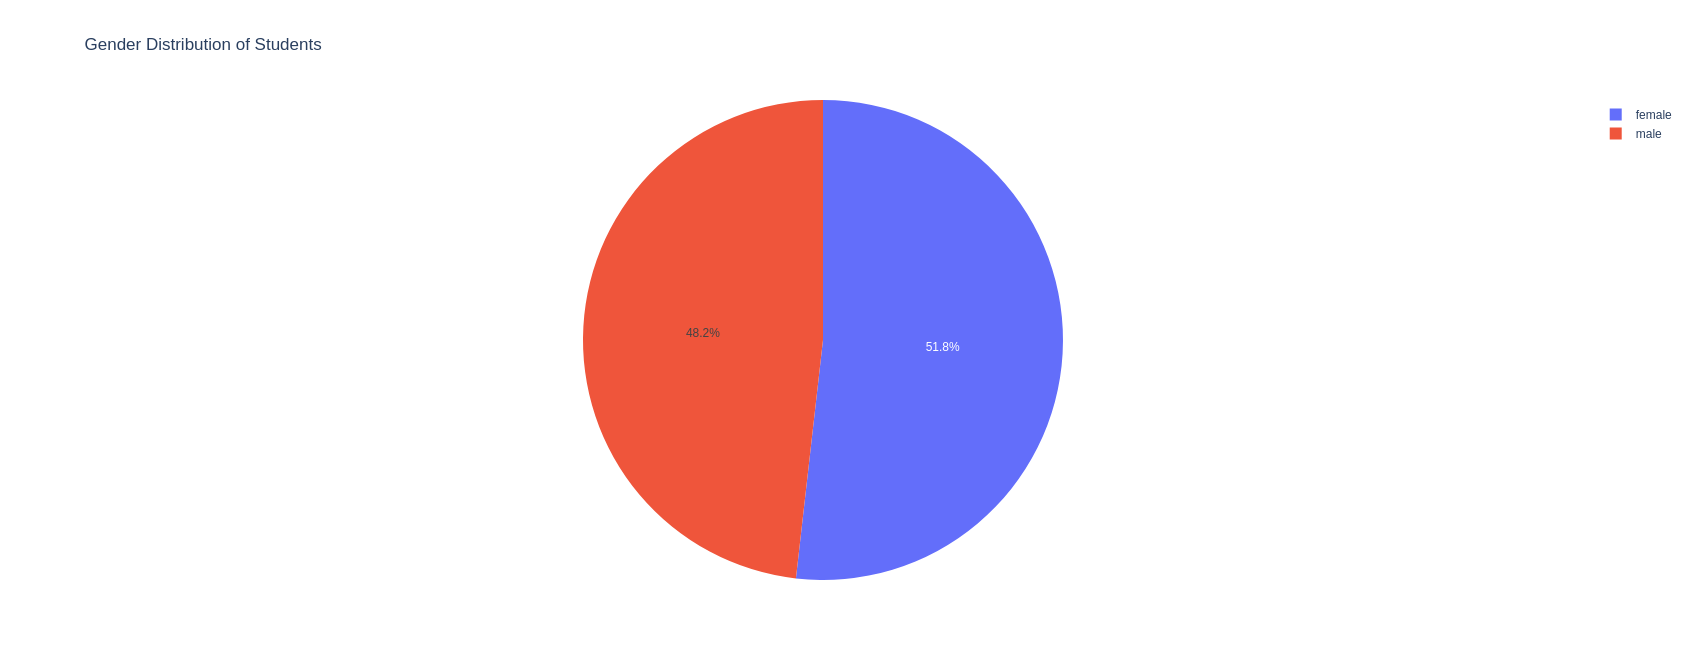

In [9]:
from IPython.display import Image
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [10]:
race_gender_pivot = data.pivot_table(
    index="race/ethnicity",
    columns="gender",
    values="math score",
    aggfunc="count"
)

race_gender_pivot


gender,female,male
race/ethnicity,,
group A,36,53
group B,104,86
group C,180,139
group D,129,133
group E,69,71


In [13]:
gd_plot = race_gender_pivot.reset_index()

fig = dt.bar(
    gd_plot,
    x="race/ethnicity",
    y=gd_plot.columns[1:],
    barmode="group",
    title="Student Count by Race/Ethnicity",
    labels={
        "value": "Number of Students",
        "race/ethnicity": "Race / Ethnicity"
    }
)

fig.show()


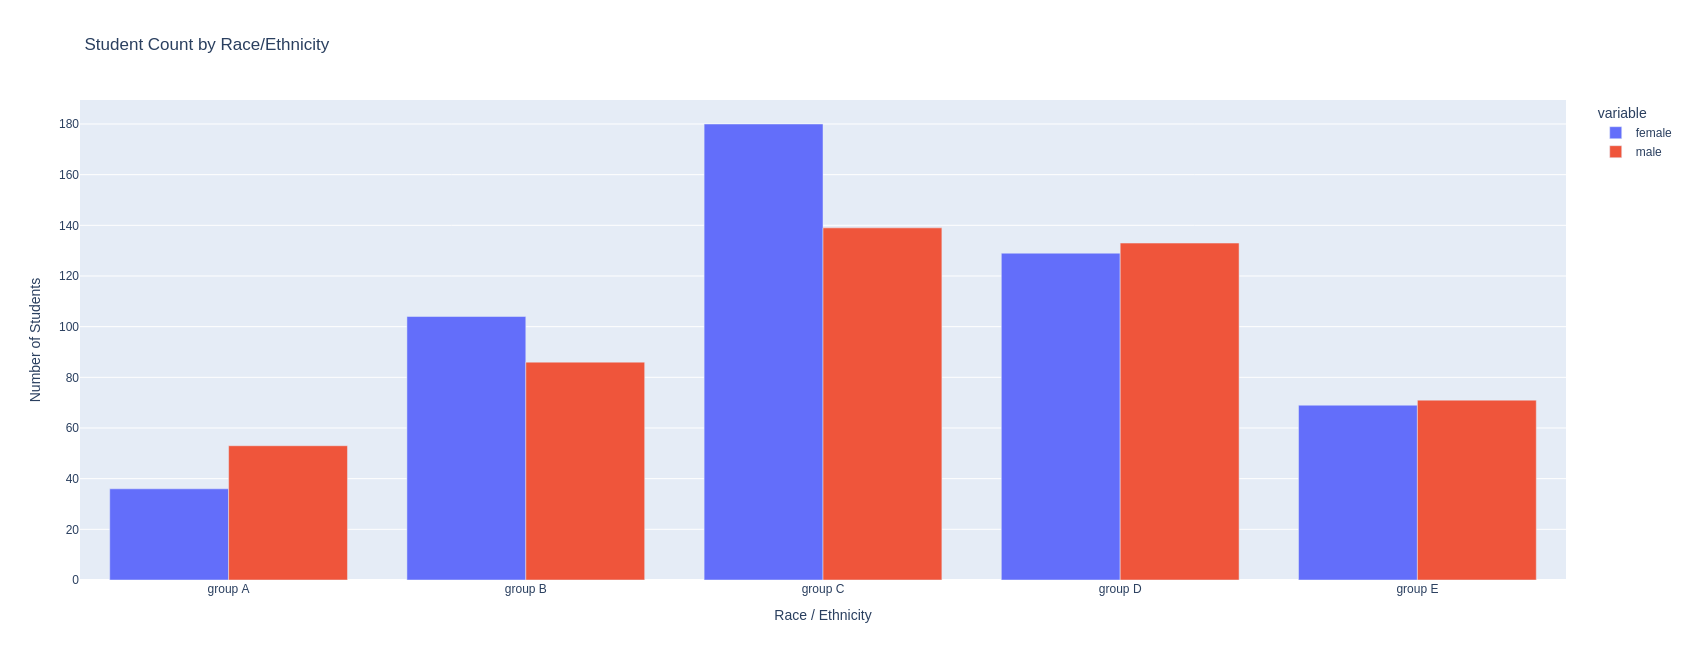

In [14]:
otp2 = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(otp2)


In [15]:
race_counts = data["race/ethnicity"].value_counts().reset_index()
race_counts.columns = ["Race/Ethnicity", "Count"]
race_counts


,Race/Ethnicity,Count
0,group C,319
1,group D,262
2,group B,190
3,group E,140
4,group A,89


In [16]:
fig = dt.bar(
    race_counts,
    x="Race/Ethnicity",
    y="Count",
    title="Student Distribution by Race/Ethnicity"
)
fig.show()


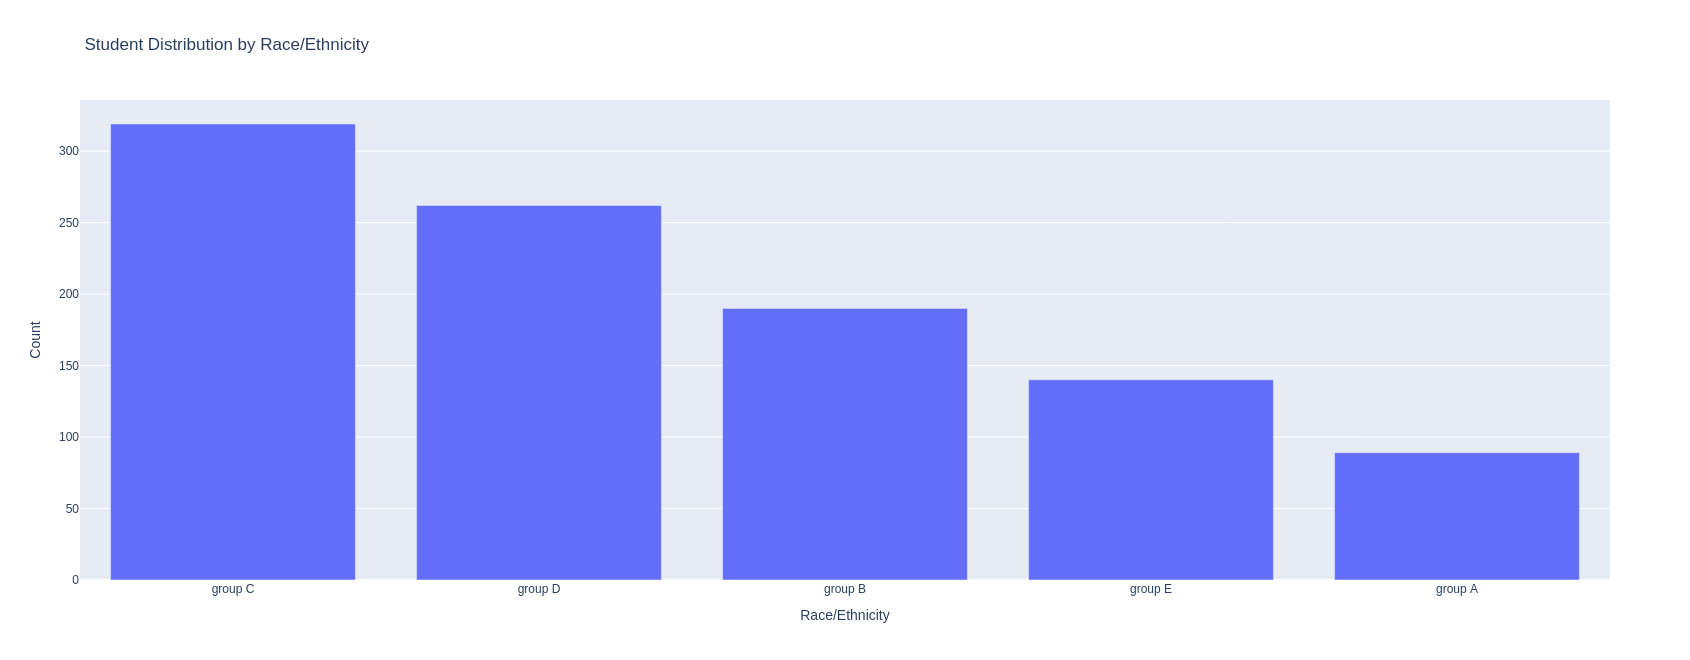

In [17]:
otp3 = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(otp3)


In [118]:

female_groupA = data[
    (data["gender"] == "female") &
    (data["race/ethnicity"] == "group A")
]

parent_edu_counts = (
    female_groupA["parental level of education"]
    .value_counts()
    .reset_index()
)
parent_edu_counts.columns = ["Parental Level of Education", "Count"]
parent_edu_counts


,Parental Level of Education,Count
0,some high school,10
1,some college,8
2,high school,7
3,associate's degree,6
4,bachelor's degree,3
5,master's degree,2


In [119]:
fig = dt.bar(
    parent_edu_counts,
    x="Parental Level of Education",
    y="Count",
    title="Parental Education Levels of Female Students (Group A)",
    labels={"Count": "Number of Students"}
)
fig.show()


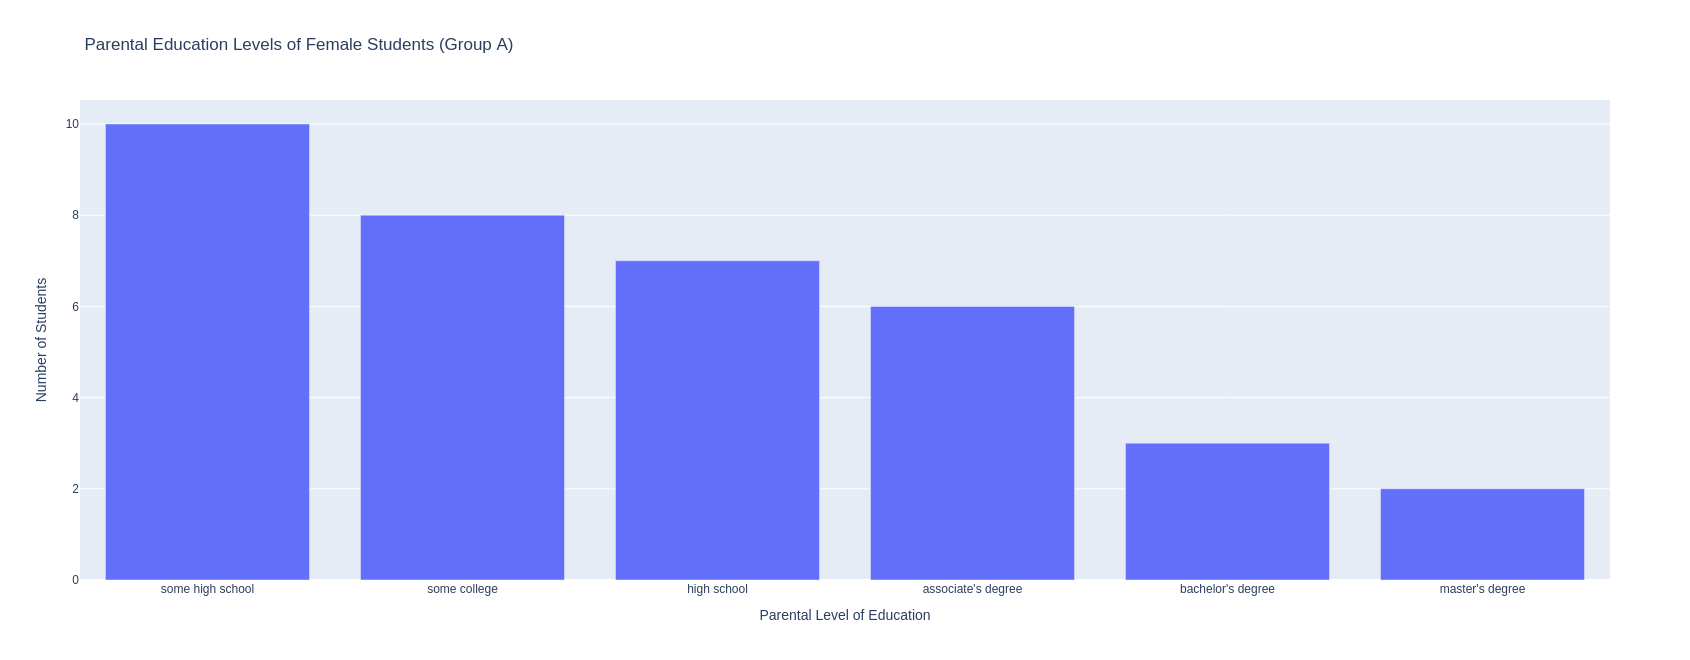

In [120]:
ot3 = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot3)


In [121]:
fig = dt.pie(
    parent_edu_counts,
    names="Parental Level of Education",
    values="Count",
    title="Distribution of Parental Education (Females – Group A)"
)
fig.show()


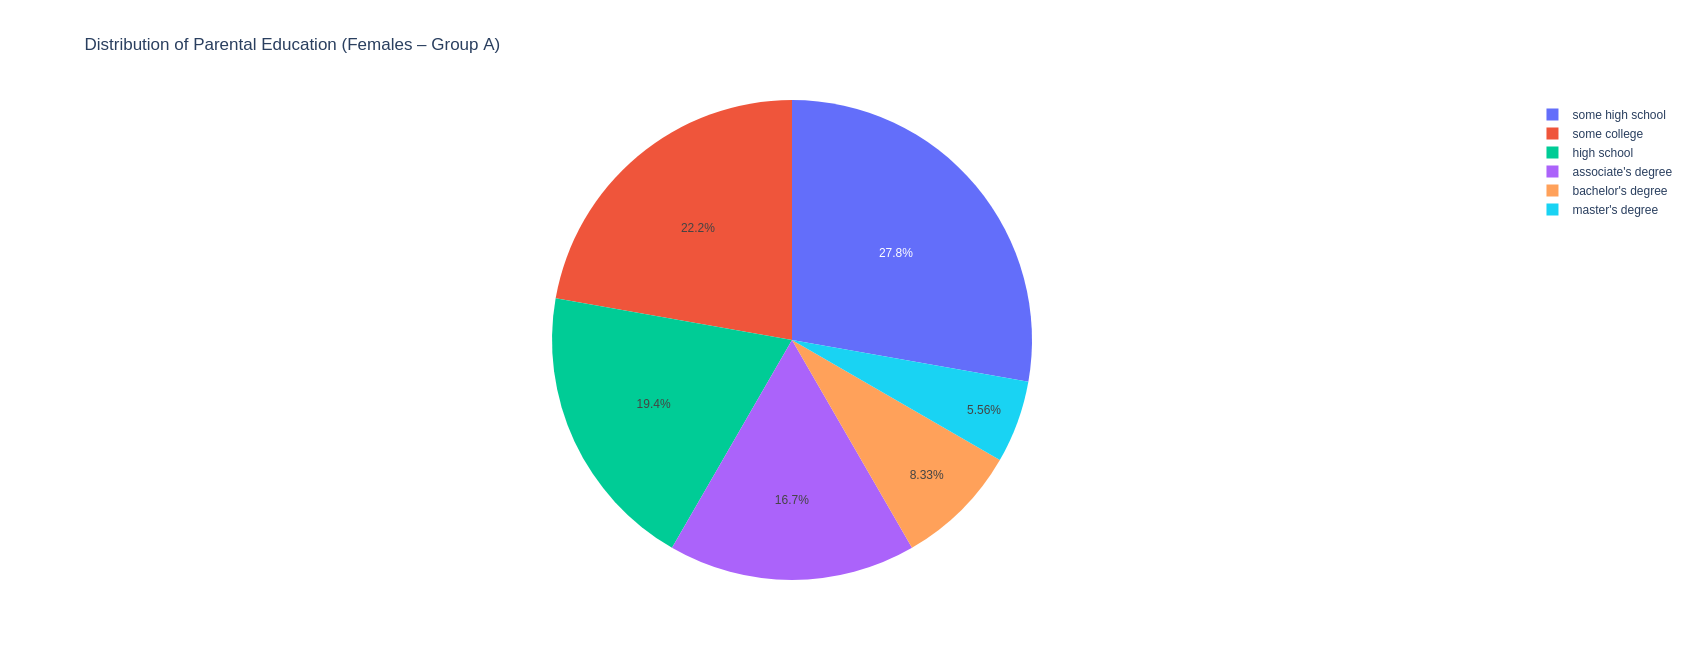

In [122]:
ot4 = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot4)


In [124]:
filtered_df = data[
    (data["race/ethnicity"] == "group A") &
    (data["gender"] == "female") &
    (data["parental level of education"] == "high school")
]

filtered_df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,perfect_score,average_score,struggling_subject
468,female,group A,high school,free/reduced,completed,77,88,85,Less than 100,83.333333,Math
586,female,group A,high school,standard,none,55,73,73,Less than 100,67.000000,Math
651,female,group A,high school,standard,completed,68,80,76,Less than 100,74.666667,Math
837,female,group A,high school,standard,completed,75,82,79,Less than 100,78.666667,Math
851,female,group A,high school,standard,none,61,68,63,Less than 100,64.000000,Math
902,female,group A,high school,free/reduced,completed,34,48,41,Less than 100,41.000000,Math
972,female,group A,high school,free/reduced,completed,53,50,60,Less than 100,54.333333,Reading


In [129]:
avg_scores = data[["math score", "reading score", "writing score"]].mean().reset_index()
avg_scores.columns = ["Subject", "Average Score"]

fig = dt.bar(
    avg_scores,
    x="Subject",
    y="Average Score",
    text="Average Score",
    title="Average Scores of Group A Female Students<br>(Parents Educated up to High School)"
)

fig.update_layout(
    yaxis_title="Average Score",
    xaxis_title="Subject",
    yaxis_range=[0, 100]
)

fig.show()


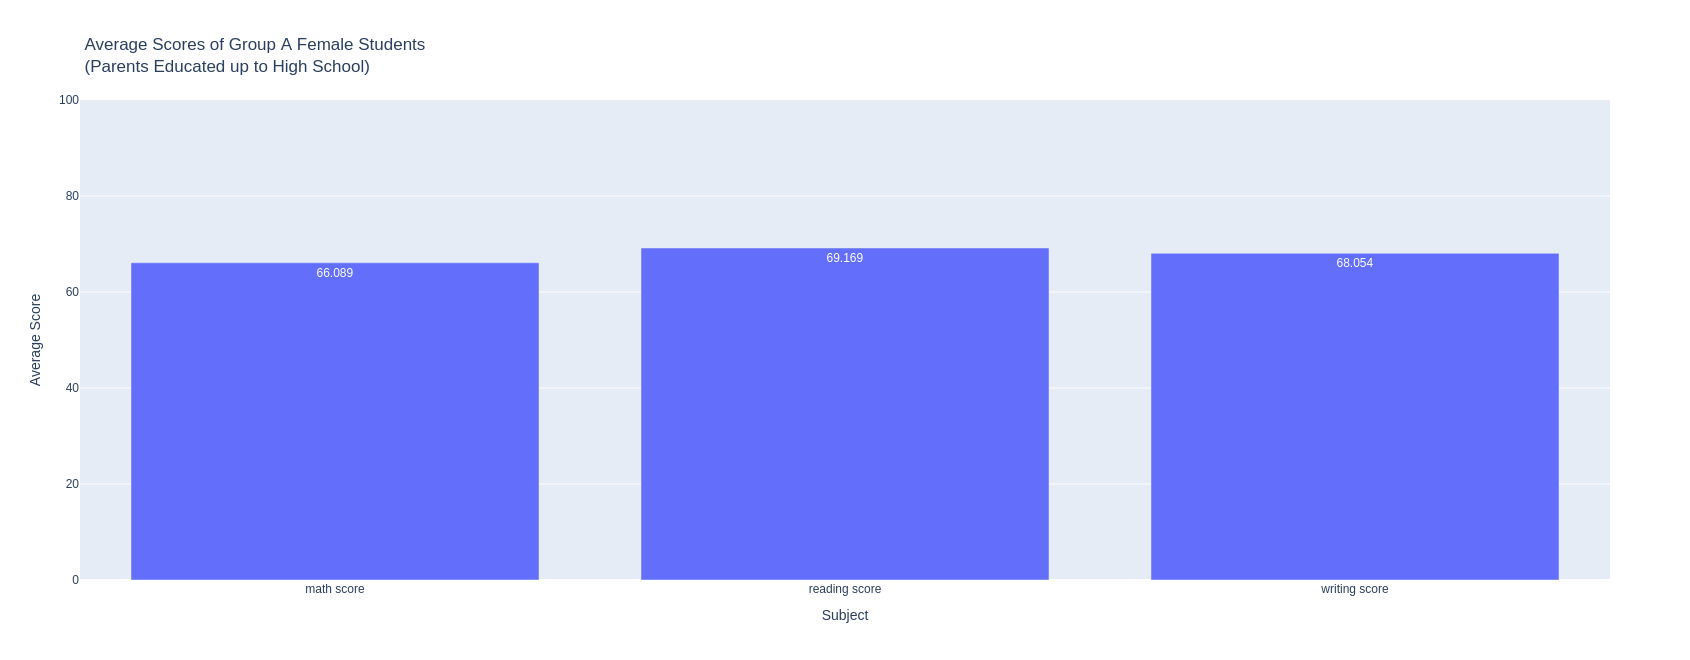

In [130]:
img_bytes = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(img_bytes)


In [126]:
avg_math = data["math score"].mean()
avg_reading = data["reading score"].mean()
avg_writing = data["writing score"].mean()

avg_math, avg_reading, avg_writing


(np.float64(66.089), np.float64(69.169), np.float64(68.054))

In [23]:
parent_edu_counts = data["parental level of education"].value_counts().reset_index()
parent_edu_counts.columns = ["Parental Education", "Count"]
parent_edu_counts


,Parental Education,Count
0,some college,226
1,associate's degree,222
2,high school,196
3,some high school,179
4,bachelor's degree,118
5,master's degree,59


In [24]:
fig = dt.bar(
    parent_edu_counts,
    x="Parental Education",
    y="Count",
    title="Parental Level of Education Distribution"
)
fig.show()

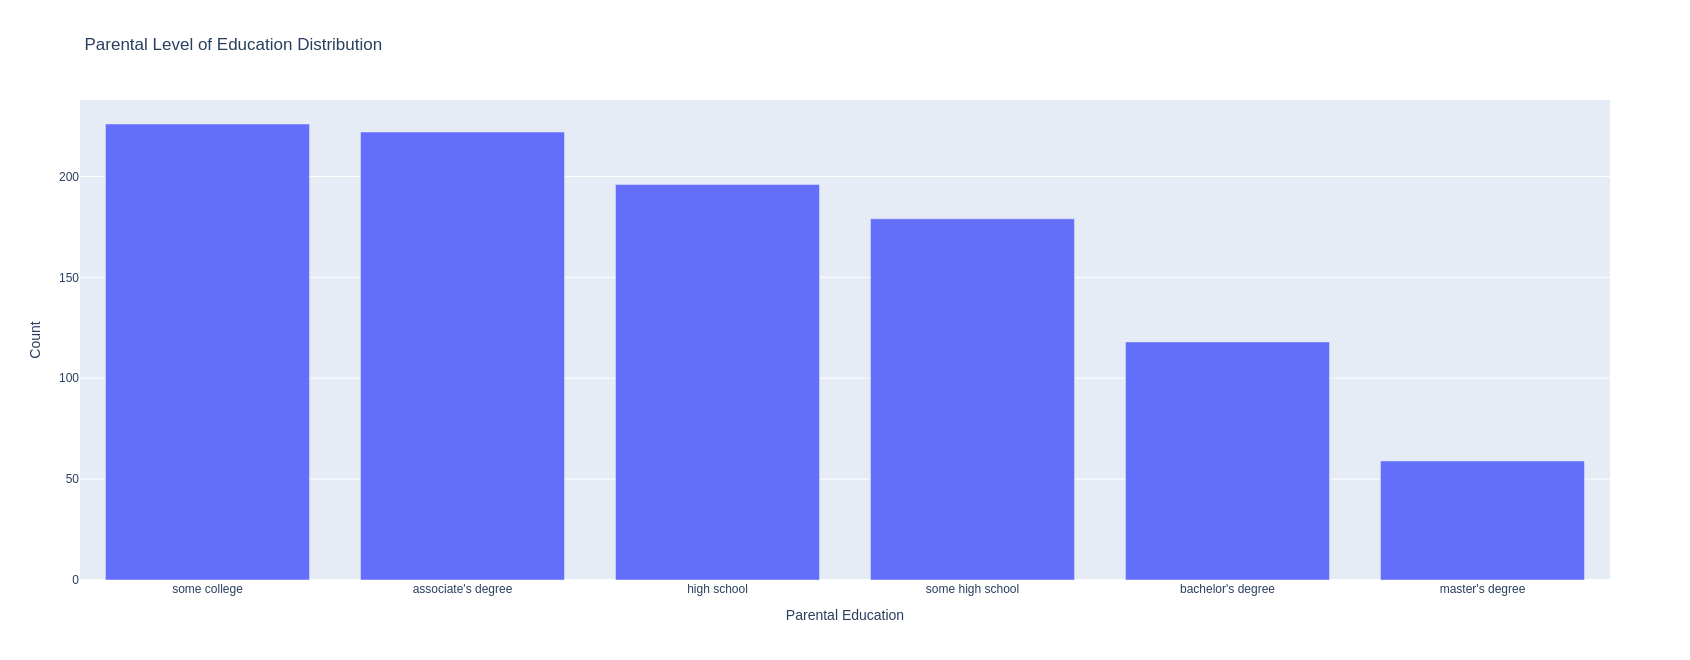

In [25]:
ot4 = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot4)


In [133]:
lunch_counts = data["lunch"].value_counts().reset_index()
lunch_counts.columns = ["Lunch Type", "Count"]
lunch_counts


,Lunch Type,Count
0,standard,645
1,free/reduced,355


In [134]:
fig = dt.pie(
    lunch_counts,
    names="Lunch Type",
    values="Count",
    title="Lunch Type Distribution"
)
fig.show()

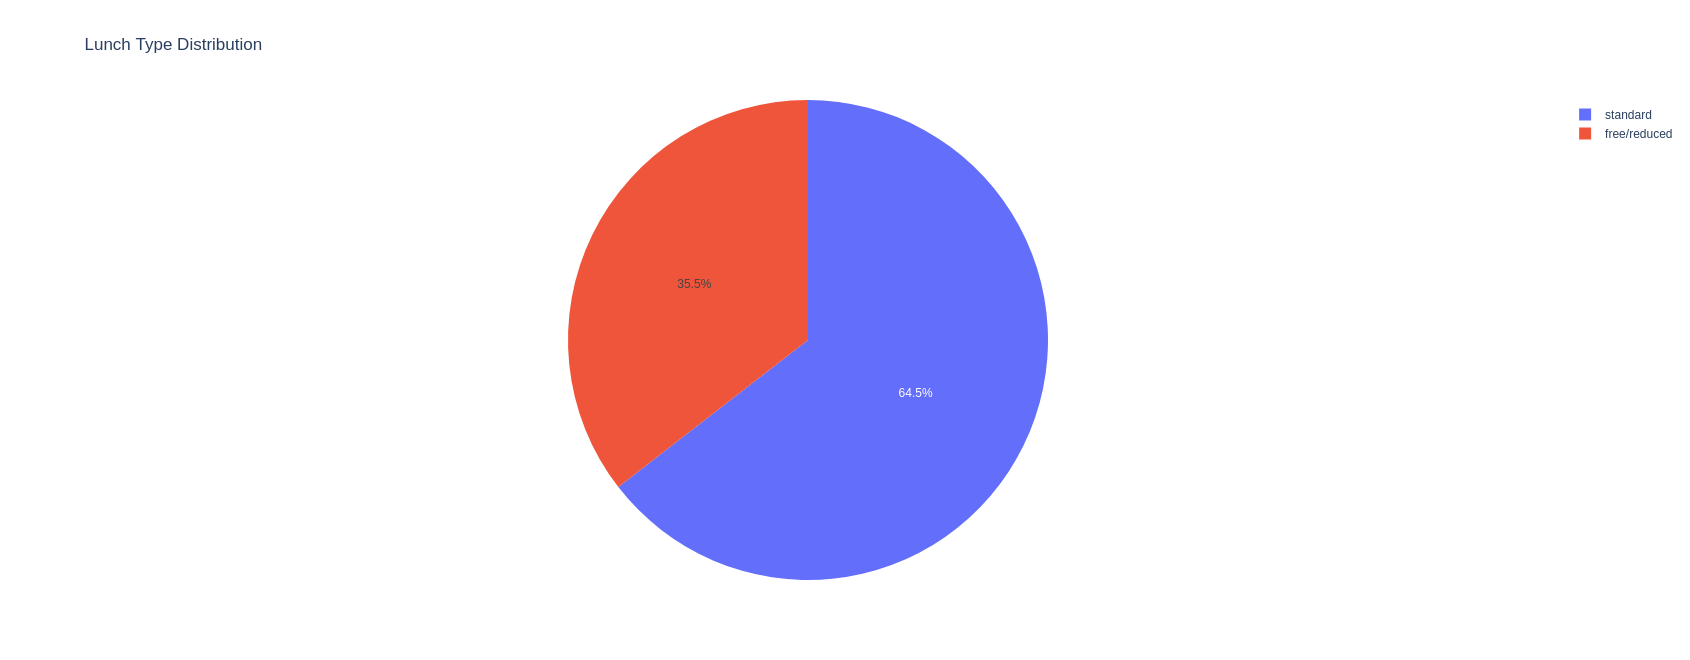

In [135]:
ot4 = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot4)


In [136]:
testprep_counts = data["test preparation course"].value_counts().reset_index()
testprep_counts.columns = ["Test Preparation", "Count"]
testprep_counts


,Test Preparation,Count
0,none,642
1,completed,358


In [137]:
fig = dt.bar(
    testprep_counts,
    x="Test Preparation",
    y="Count",
    title="Test Preparation Course Participation"
)
fig.show()

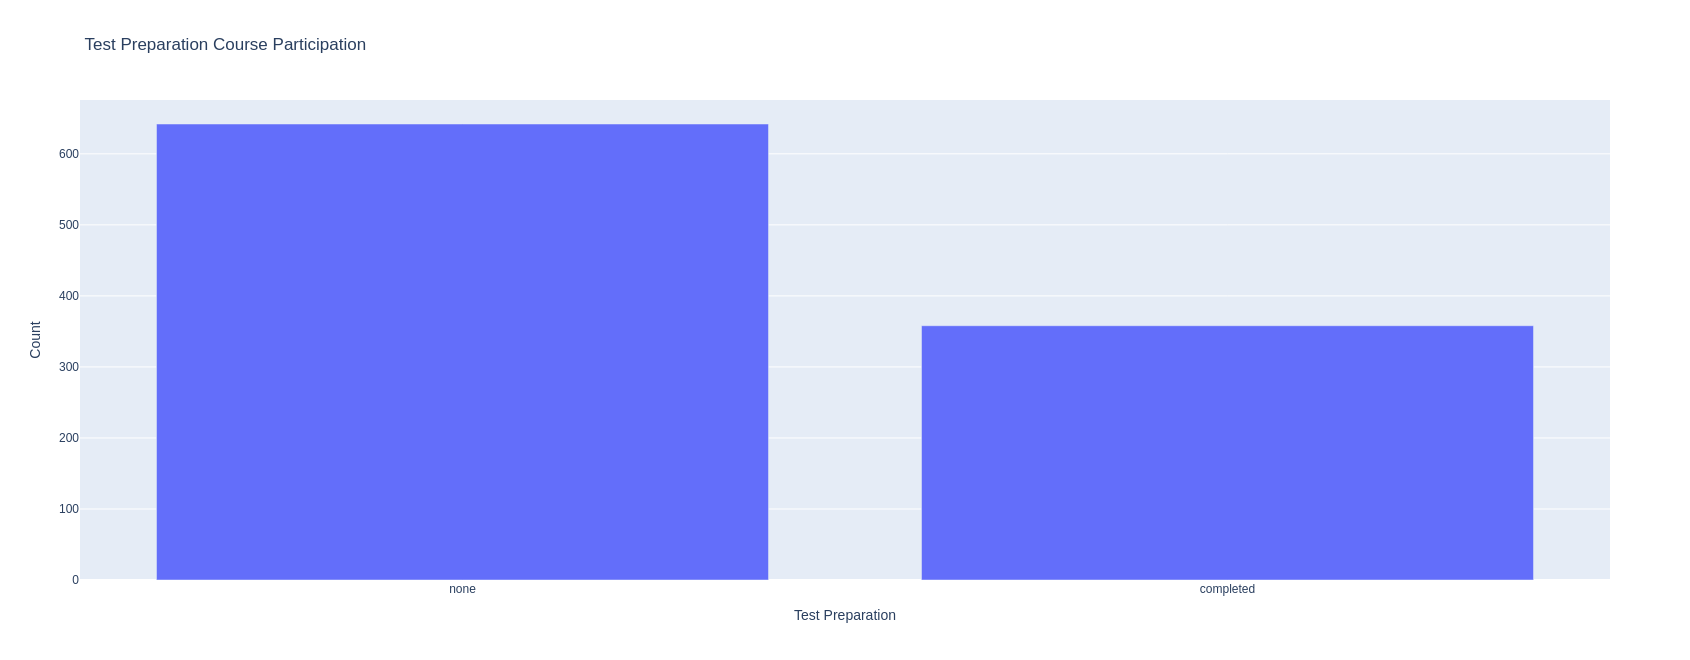

In [138]:
ot5 = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot5)


In [139]:

free_lunch_completed = data[
    (data["lunch"] == "free/reduced") &
    (data["test preparation course"] == "completed")
]

gender_counts = (
    free_lunch_completed["gender"]
    .value_counts()
    .reset_index()
)
gender_counts.columns = ["Gender", "Count"]
gender_counts

,Gender,Count
0,female,70
1,male,61


In [140]:
fig = dt.bar(
    gender_counts,
    x="Gender",
    y="Count",
    title="Gender Distribution (Completed Test Prep + Free/Reduced Lunch)",
    labels={"Count": "Number of Students"}
)
fig.show()

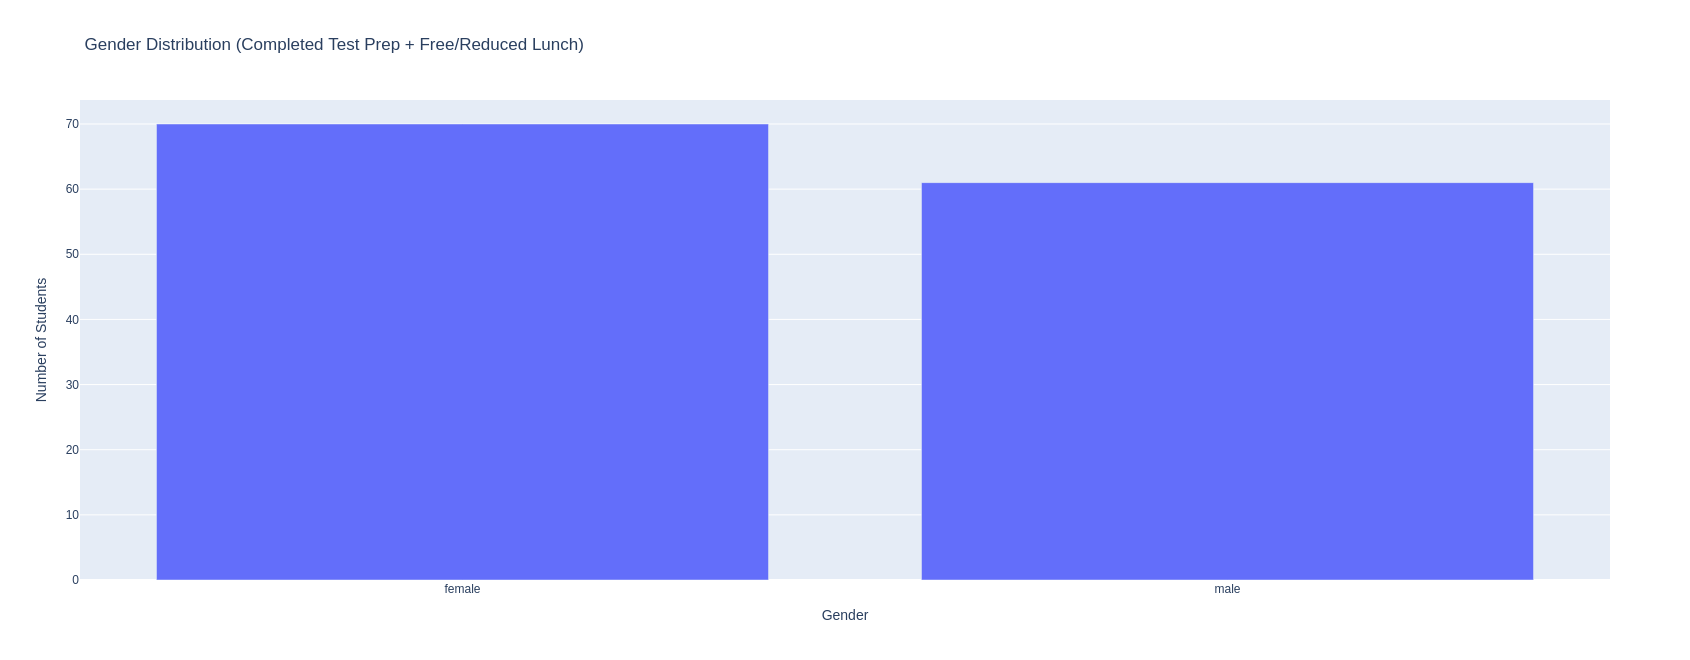

In [141]:
ot6 = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot6)


In [142]:
fig = dt.pie(
    gender_counts,
    names="Gender",
    values="Count",
    title="Gender Share (Completed Test Prep + Free/Reduced Lunch)"
)
fig.show()

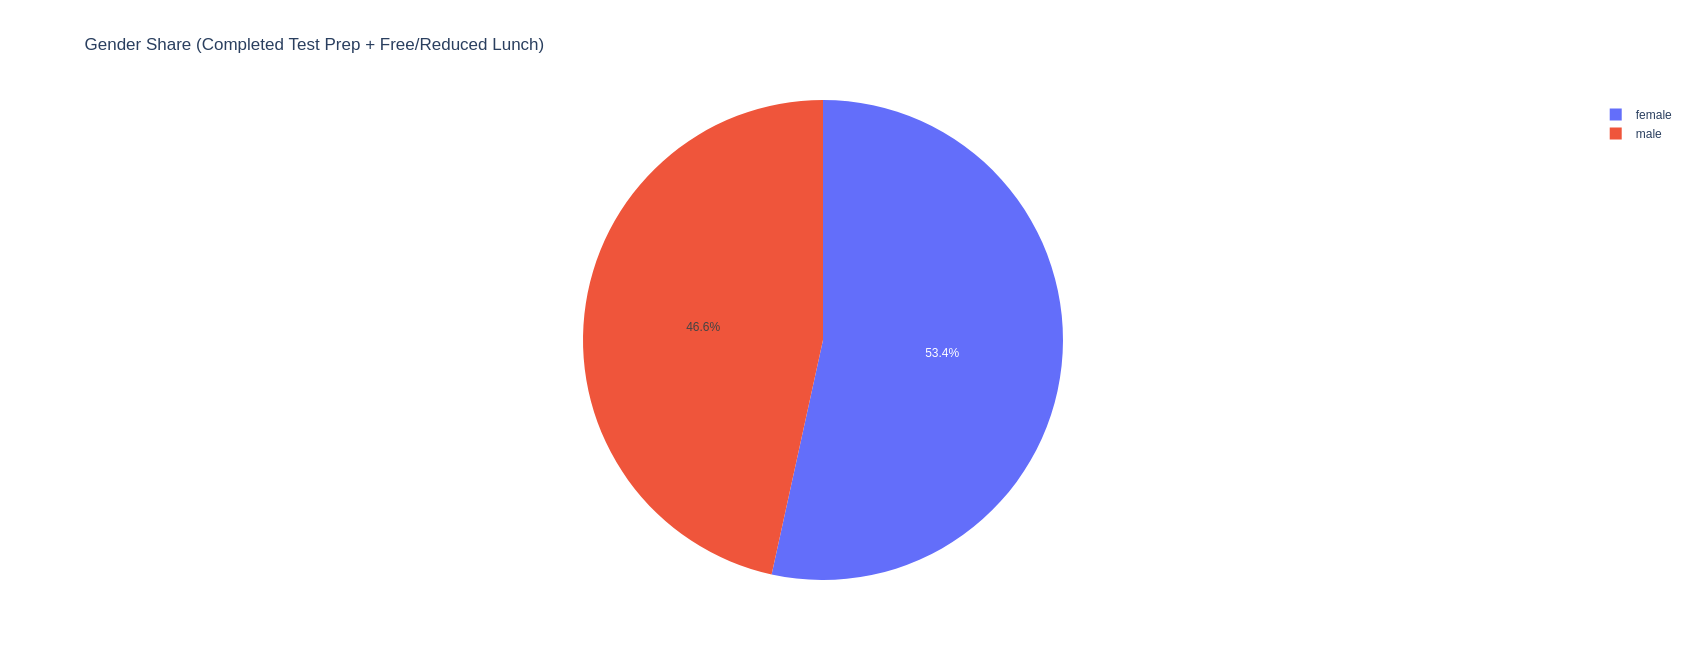

In [143]:
ot7 = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot7)


In [144]:

free_lunch_data = data[data["lunch"] == "free/reduced"]


testprep_gender_counts = (
    free_lunch_data
    .groupby(["gender", "test preparation course"])
    .size()
    .reset_index(name="Count")
)

testprep_gender_counts

,gender,test preparation course,Count
0,female,completed,70
1,female,none,119
2,male,completed,61
3,male,none,105


In [145]:
fig = dt.bar(
    testprep_gender_counts,
    x="gender",
    y="Count",
    color="test preparation course",
    barmode="group",
    title="Test Preparation Course by Gender (Free/Reduced Lunch)",
    labels={
        "gender": "Gender",
        "Count": "Number of Students",
        "test preparation course": "Test Preparation"
    }
)
fig.show()

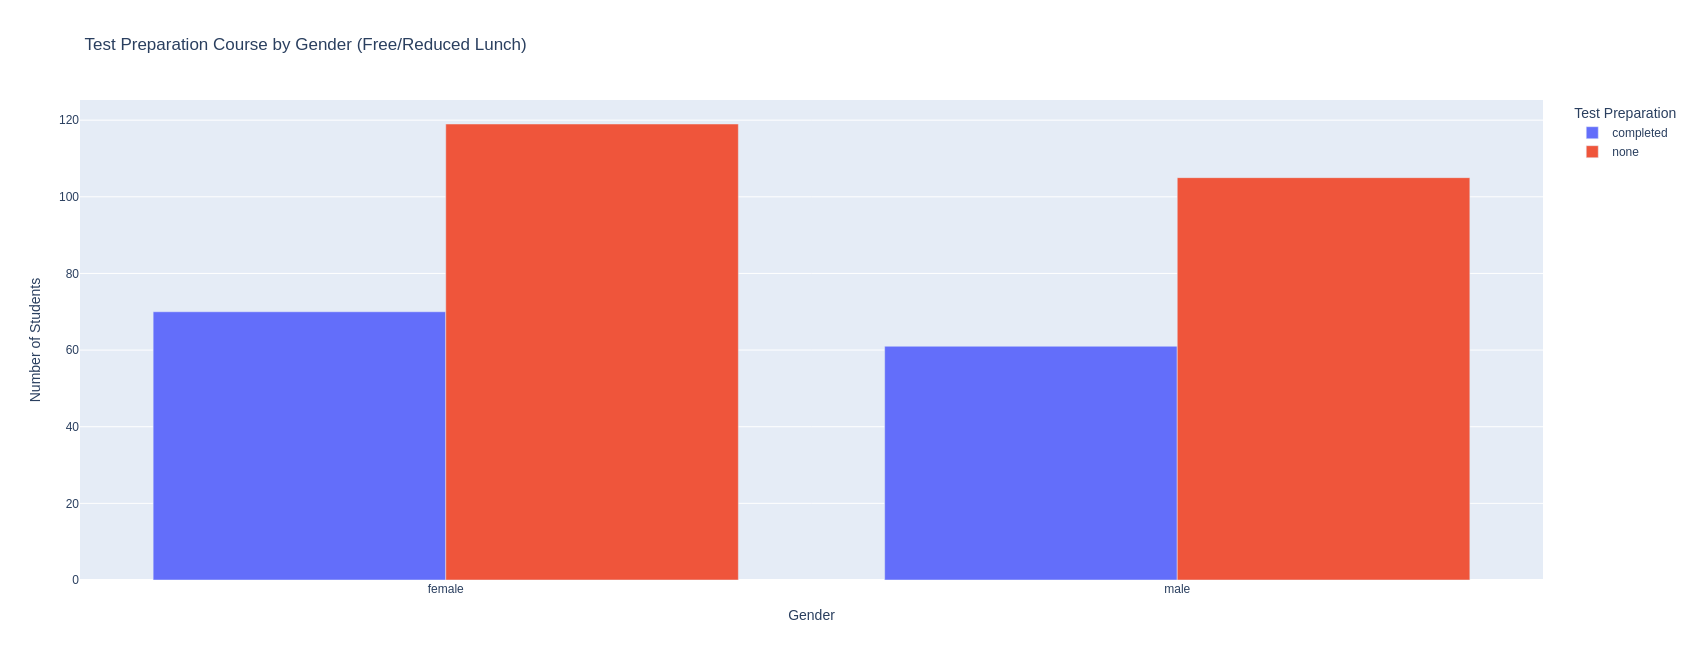

In [146]:
ot8 = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot8)


In [147]:
fig = dt.bar(
    testprep_gender_counts,
    x="gender",
    y="Count",
    color="test preparation course",
    barmode="stack",
    title="Gender-wise Test Preparation Completion (Free/Reduced Lunch)"
)
fig.show()

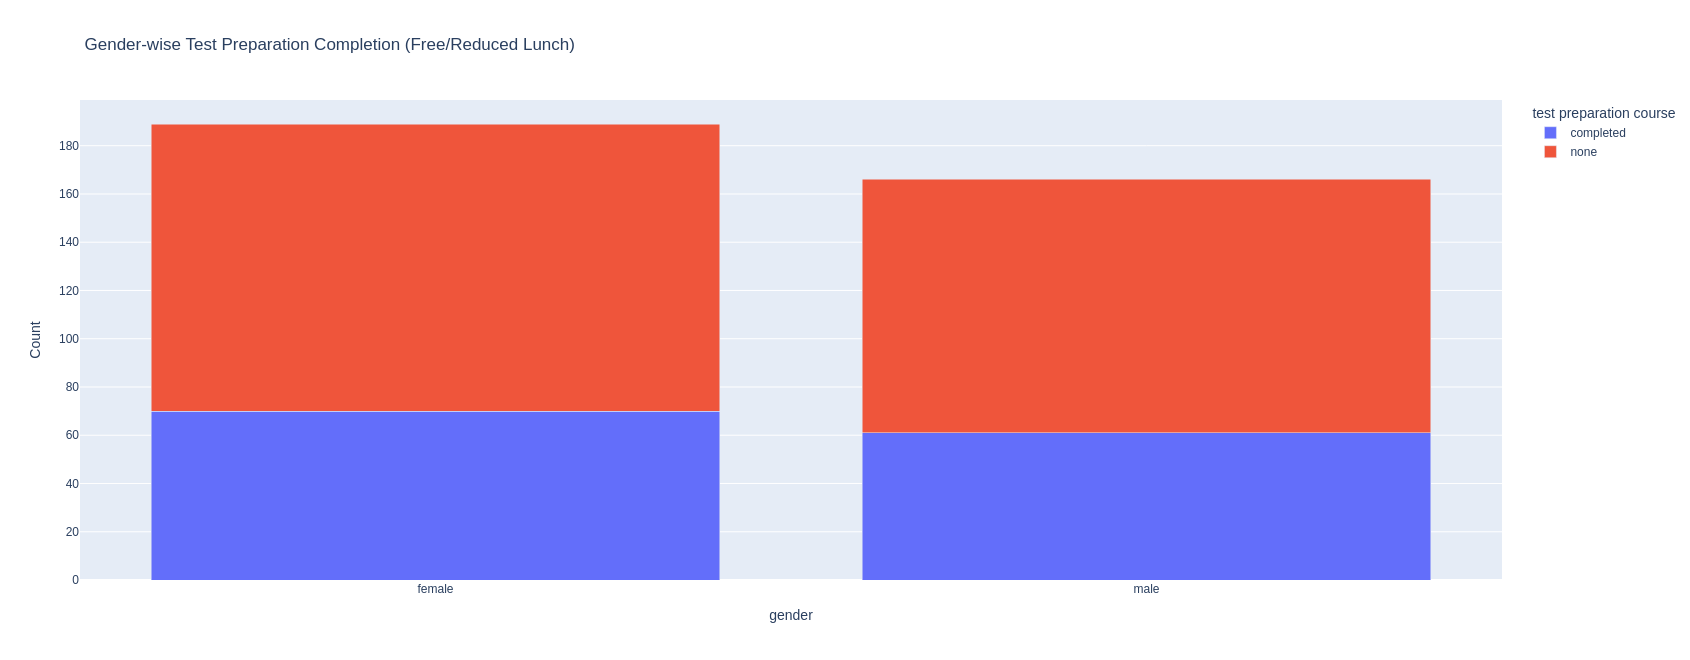

In [148]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [149]:

female_data = testprep_gender_counts[testprep_gender_counts["gender"] == "female"]
male_data = testprep_gender_counts[testprep_gender_counts["gender"] == "male"]

fig = dt.pie(
    female_data,
    names="test preparation course",
    values="Count",
    title="Test Preparation Status (Females – Free/Reduced Lunch)"
)

fig = dt.pie(
    male_data,
    names="test preparation course",
    values="Count",
    title="Test Preparation Status (Males – Free/Reduced Lunch)"
)
fig.show()

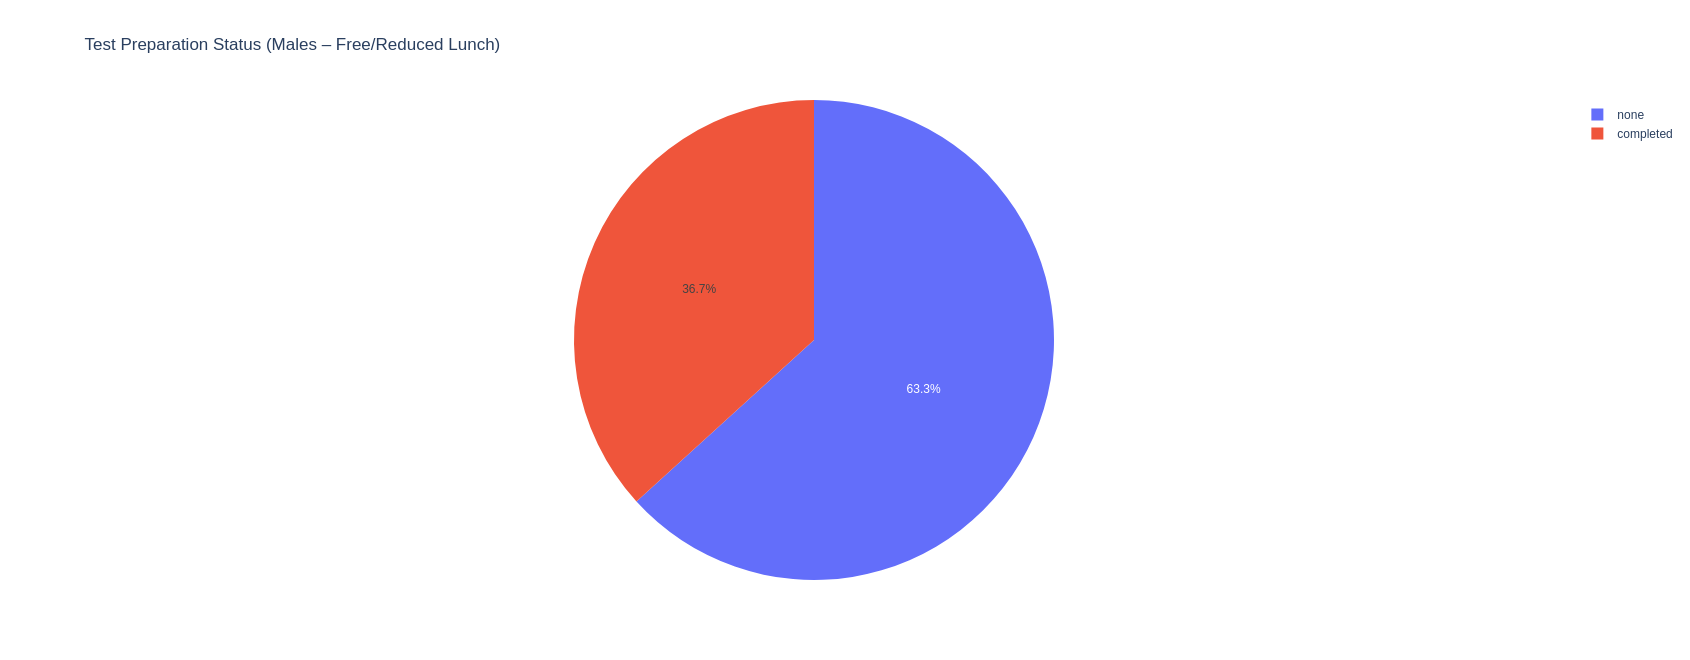

In [150]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [151]:

data["perfect_score"] = data.apply(
    lambda x: "100 Marks"
    if (x["math score"] == 100 or x["reading score"] == 100 or x["writing score"] == 100)
    else "Less than 100",
    axis=1
)

gender_score_counts = (
    data
    .groupby(["gender", "perfect_score"])
    .size()
    .reset_index(name="Count")
)

gender_score_counts

,gender,perfect_score,Count
0,female,100 Marks,18
1,female,Less than 100,500
2,male,100 Marks,5
3,male,Less than 100,477


In [152]:
fig = dt.bar(
    gender_score_counts,
    x="gender",
    y="Count",
    color="perfect_score",
    barmode="group",
    title="Gender-wise Distribution: 100 Marks vs Less than 100",
    labels={
        "gender": "Gender",
        "Count": "Number of Students",
        "perfect_score": "Score Category"
    }
)
fig.show()

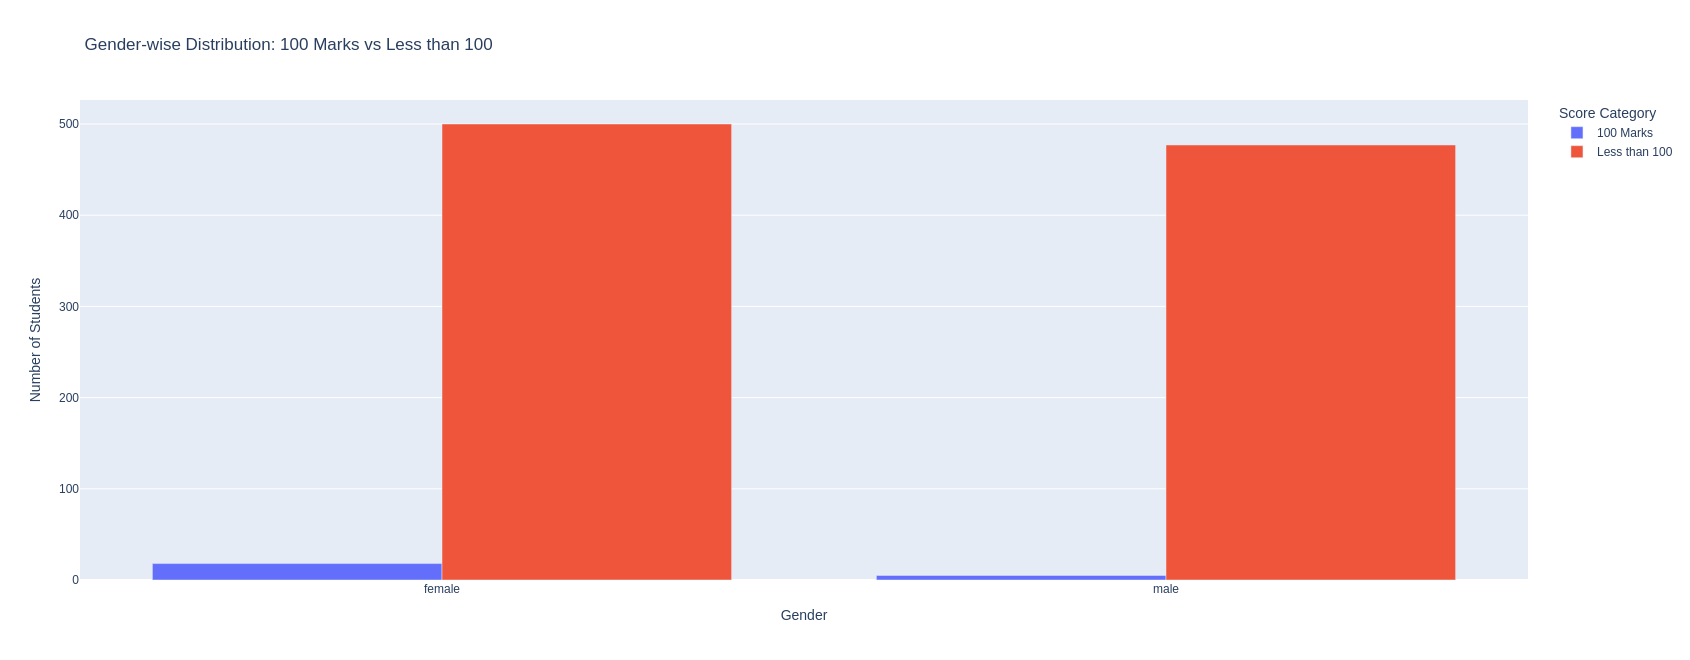

In [153]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [154]:

fig = dt.bar(
    gender_score_counts,
    x="gender",
    y="Count",
    color="perfect_score",
    barmode="stack",
    title="Gender-wise Composition: Perfect Score vs Less than 100"
)
fig.show()

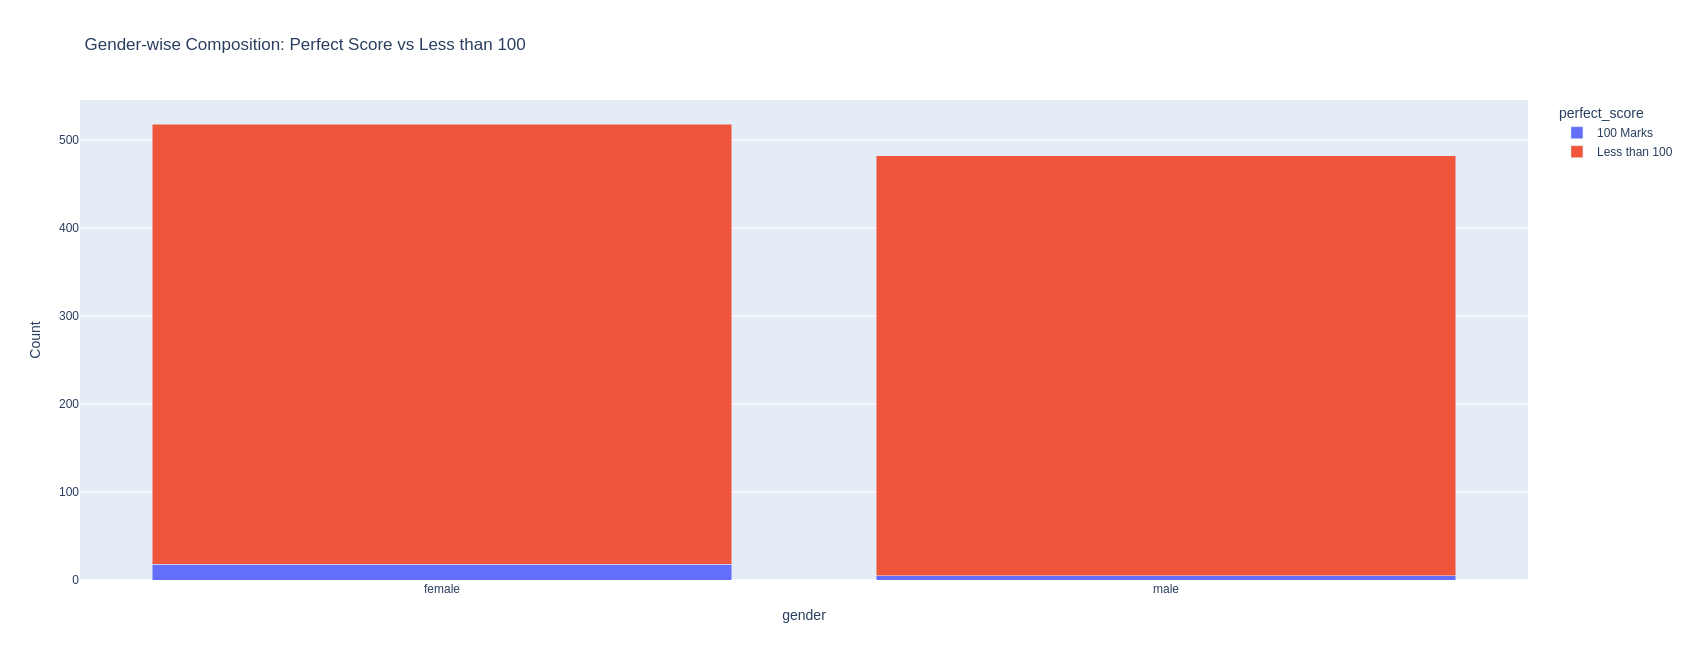

In [155]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [156]:

female_scores = gender_score_counts[gender_score_counts["gender"] == "female"]
male_scores = gender_score_counts[gender_score_counts["gender"] == "male"]

fig = dt.pie(
    female_scores,
    names="perfect_score",
    values="Count",
    title="Score Distribution for Females (100 vs <100)"
)

fig = dt.pie(
    male_scores,
    names="perfect_score",
    values="Count",
    title="Score Distribution for Males (100 vs <100)"
)
fig.show()

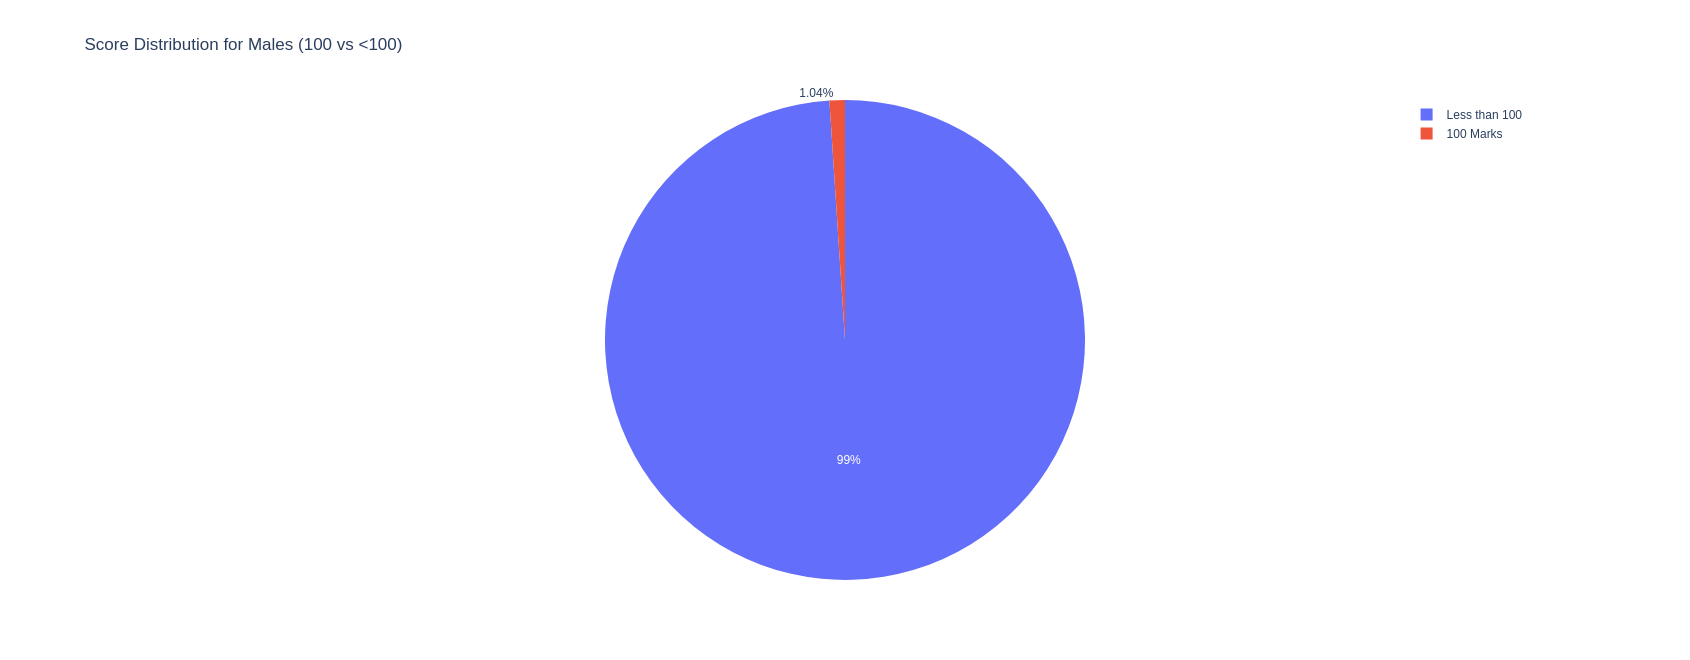

In [157]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [158]:

total_scores_gender = (
    data
    .groupby("gender")[["math score", "reading score", "writing score"]]
    .sum()
    .reset_index()
)

total_scores_gender

total_scores_melted = total_scores_gender.melt(
    id_vars="gender",
    value_vars=["math score", "reading score", "writing score"],
    var_name="Subject",
    value_name="Total Marks"
)

total_scores_melted



,gender,Subject,Total Marks
0,female,math score,32962
1,male,math score,33127
2,female,reading score,37611
3,male,reading score,31558
4,female,writing score,37538
5,male,writing score,30516


In [159]:
fig = dt.bar(
    total_scores_melted,
    x="gender",
    y="Total Marks",
    color="Subject",
    barmode="group",
    title="Total Marks Gained by Gender in Math, Reading, and Writing",
    labels={
        "gender": "Gender",
        "Total Marks": "Total Marks Gained",
        "Subject": "Subject"
    }
)
fig.show()

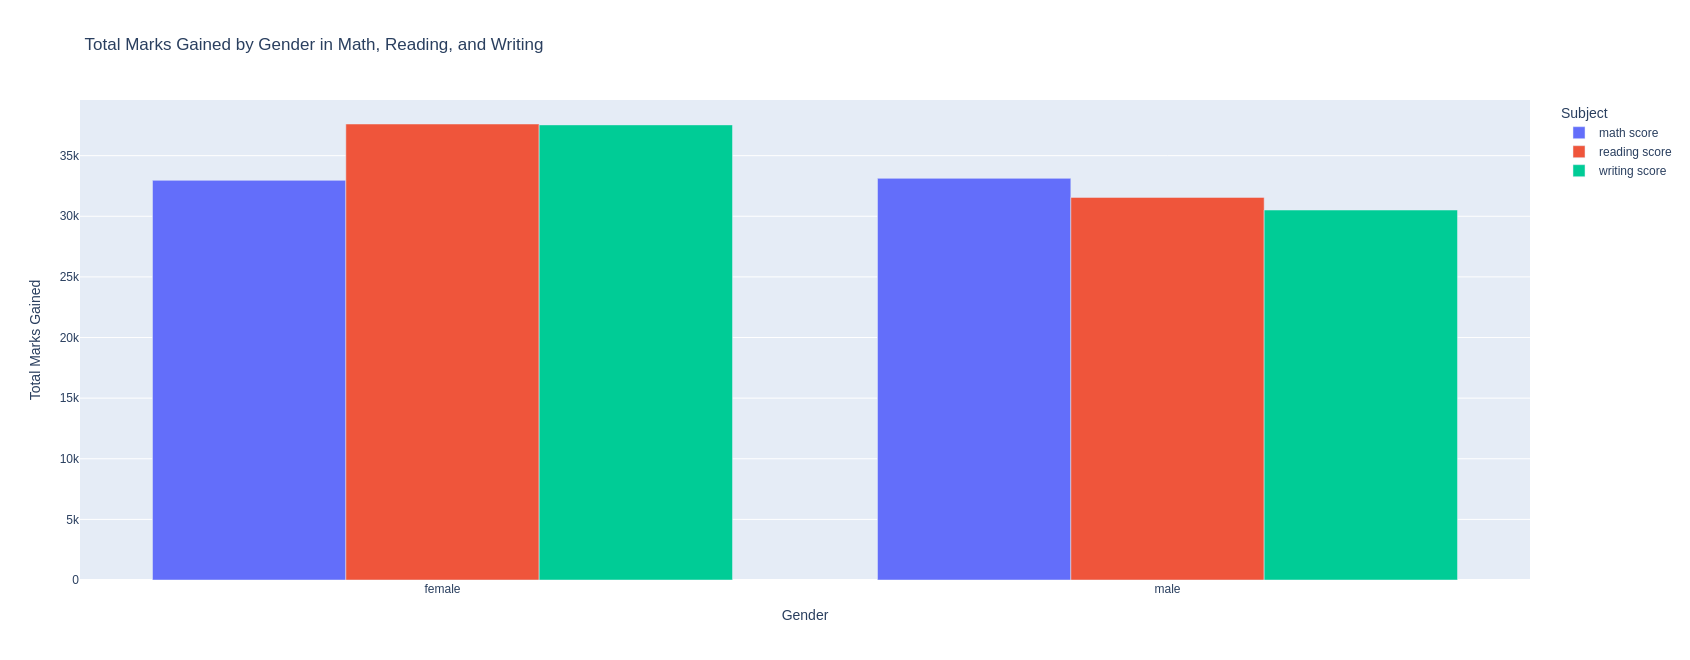

In [160]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [161]:

fig = dt.bar(
    total_scores_melted,
    x="gender",
    y="Total Marks",
    color="Subject",
    barmode="stack",
    title="Overall Subject-wise Contribution to Total Marks by Gender"
)
fig.show()

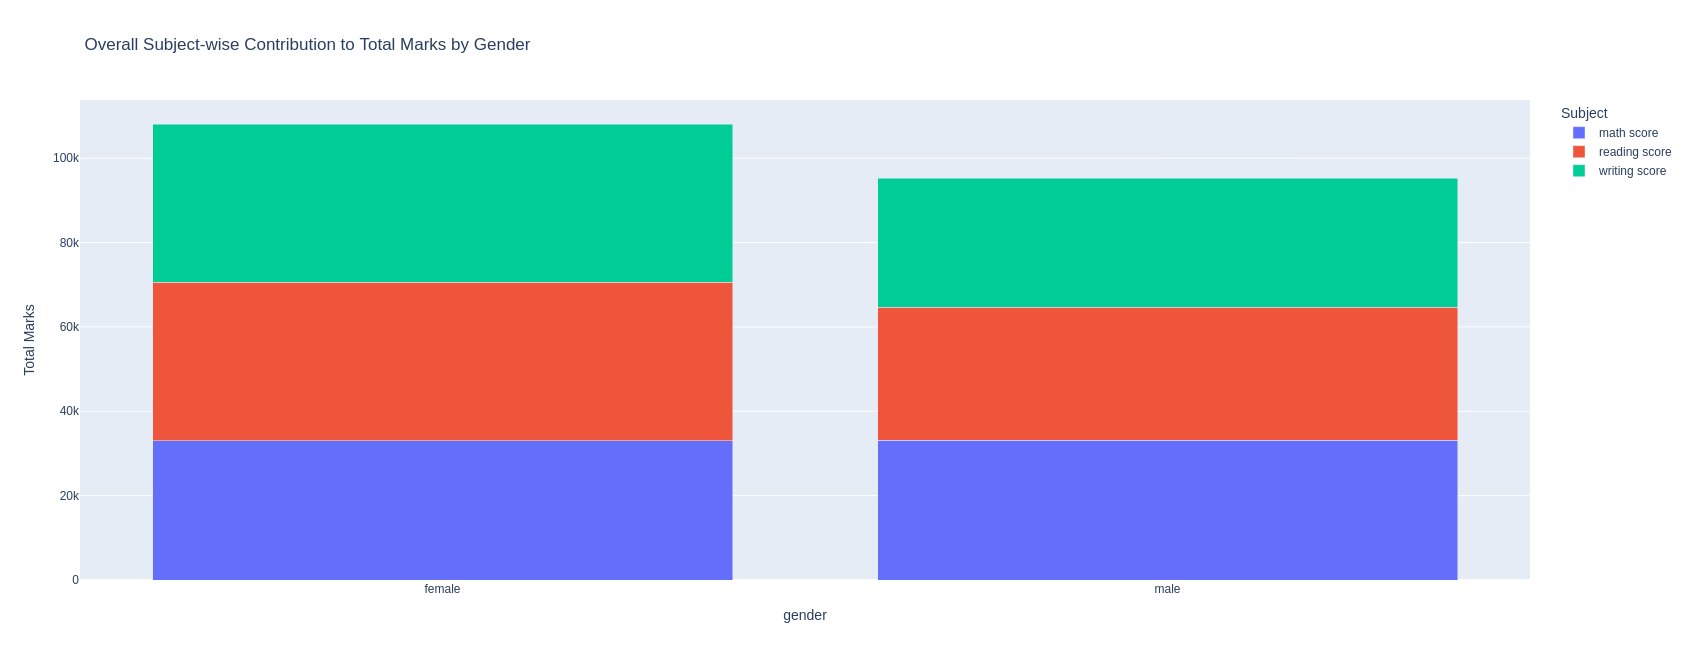

In [162]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [163]:
total_marks_gender = (
    data
    .groupby("gender")
    .agg(
        Math_Total=("math score", "sum"),
        Reading_Writing_Total=("reading score", "sum"),
        Writing_Total=("writing score", "sum")

    )
)


total_marks_gender["Reading_Writing_Total"] = (
    data.groupby("gender")["reading score"].sum() +
    data.groupby("gender")["writing score"].sum()
)

total_marks_gender = total_marks_gender.reset_index()
total_marks_gender


,gender,Math_Total,Reading_Writing_Total,Writing_Total
0,female,32962,75149,37538
1,male,33127,62074,30516


In [164]:
combined_totals = {
    "Combined_Math_Total": total_marks_gender["Math_Total"].sum(),
    "Combined_Reading_Writing_Total": total_marks_gender["Reading_Writing_Total"].sum()
}

combined_totals


{'Combined_Math_Total': np.int64(66089),
 'Combined_Reading_Writing_Total': np.int64(137223)}

In [165]:
import pandas as pd
combined_df = pd.DataFrame(
    list(combined_totals.items()),
    columns=["Category", "Combined_Total"]
)

combined_df


,Category,Combined_Total
0,Combined_Math_Total,66089
1,Combined_Reading_Writing_Total,137223


In [166]:

combined_math_total = 66089
combined_reading_writing_total = 137223

data_for_plot = pd.DataFrame({
    "Category": ["Combined Math Total", "Combined Reading + Writing Total"],
    "Total": [combined_math_total, combined_reading_writing_total]
})

fig = dt.bar(data_for_plot,
             x="Total",
             y="Category",
             orientation="h",
             title="Comparison of Combined Math Total and Combined Reading + Writing Total",
             labels={"Total": "Total Marks", "Category": "Category"},
             color="Category",
             text="Total",
             template="plotly_dark")


fig.show()


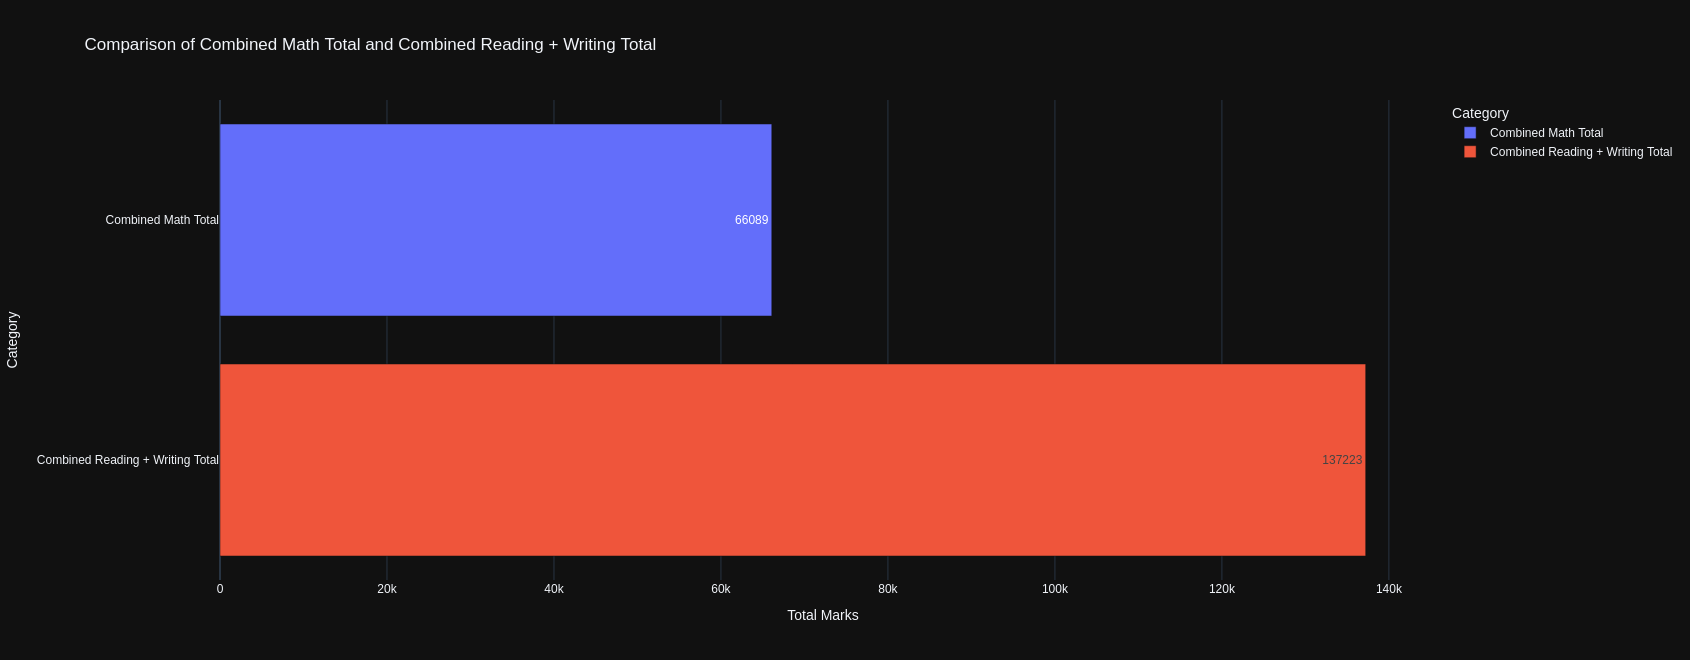

In [167]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [168]:

total_marks_gender = (
    data
    .groupby("gender")
    .agg(
        Math_Total=("math score", "sum"),
        Reading_Writing_Total=("reading score", "sum")
    )
)

total_marks_gender["Reading_Writing_Total"] = (
    data.groupby("gender")["reading score"].sum() +
    data.groupby("gender")["writing score"].sum()
)

total_marks_gender = total_marks_gender.reset_index()
total_marks_gender

total_marks_melted = total_marks_gender.melt(
    id_vars="gender",
    value_vars=["Math_Total", "Reading_Writing_Total"],
    var_name="Subject Category",
    value_name="Total Marks"
)

total_marks_melted




,gender,Subject Category,Total Marks
0,female,Math_Total,32962
1,male,Math_Total,33127
2,female,Reading_Writing_Total,75149
3,male,Reading_Writing_Total,62074


In [169]:
df = pd.DataFrame(total_marks_melted)

fig = dt.bar(df,
             x="Total Marks",
             y="gender",
             color="Subject Category",
             orientation="h",
             title="Total Marks by Gender in Math and Reading + Writing",
             labels={"Total Marks": "Total Marks", "gender": "Gender", "Subject Category": "Subject Category"},
             text="Total Marks",
             template="plotly_dark")

# Show the plot
fig.show()


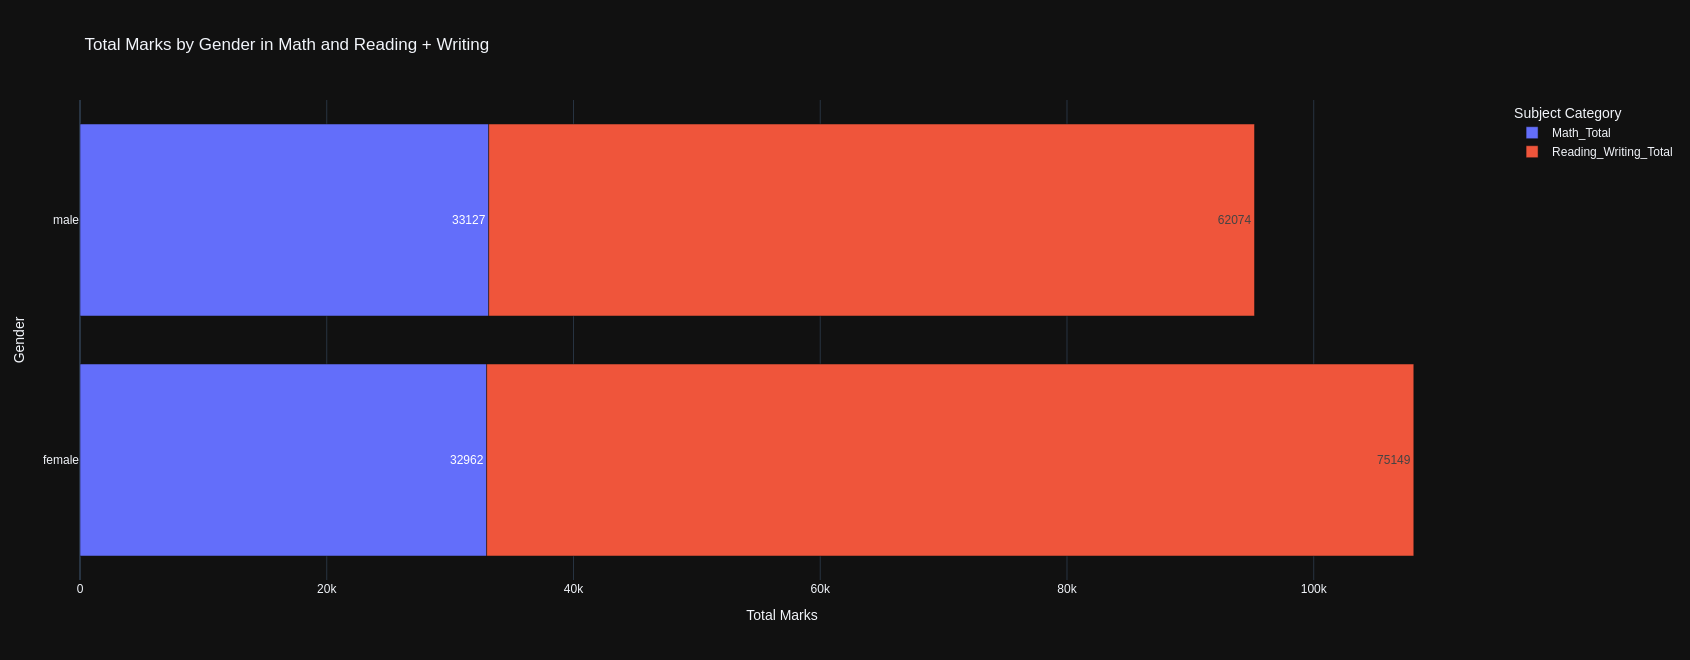

In [170]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [171]:
fig = dt.bar(
    total_marks_melted,
    x="gender",
    y="Total Marks",
    color="Subject Category",
    barmode="group",
    title="Total Marks by Gender: Math vs Reading + Writing",
    labels={
        "gender": "Gender",
        "Total Marks": "Total Marks Gained",
        "Subject Category": "Marks Category"
    }
)
fig.show()

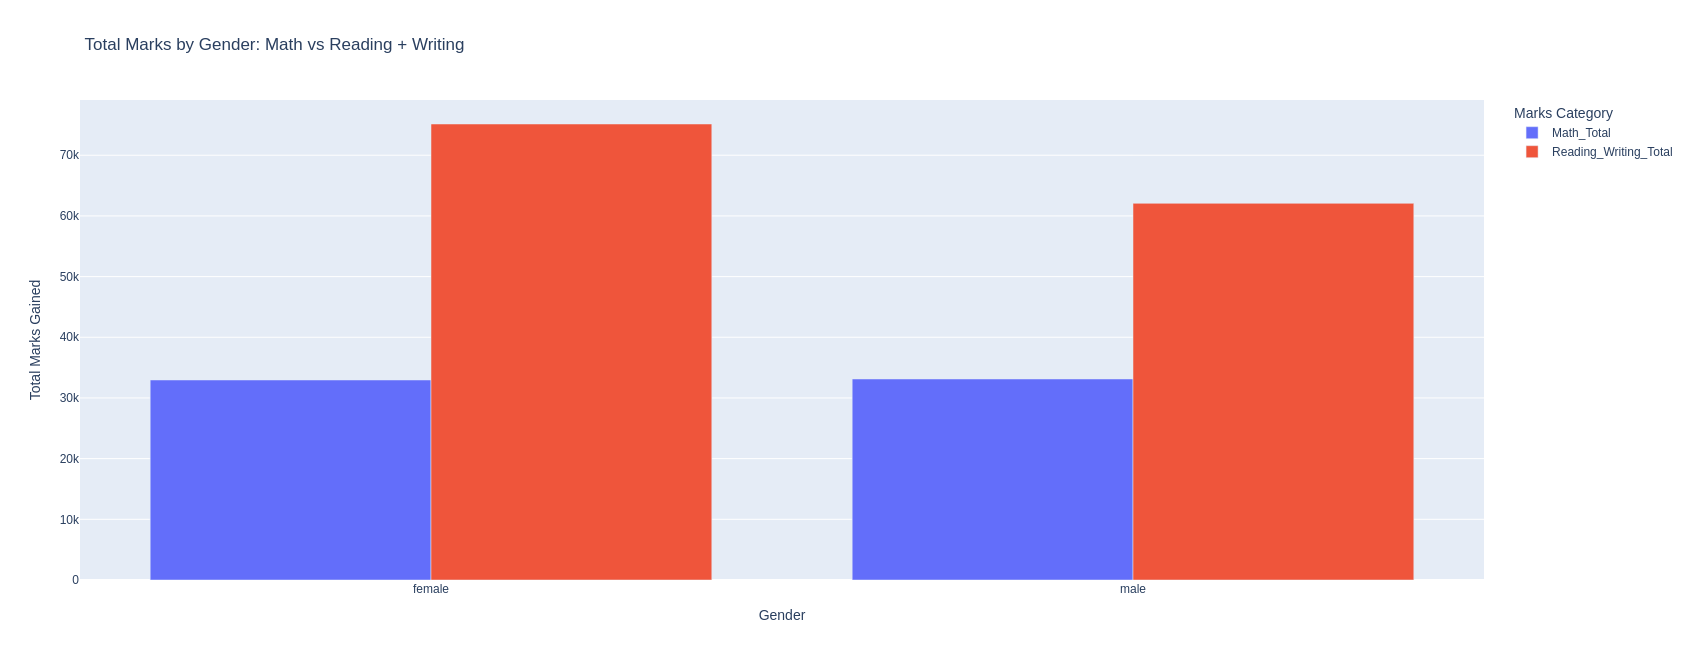

In [172]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [173]:

fig = dt.bar(
    total_marks_melted,
    x="gender",
    y="Total Marks",
    color="Subject Category",
    barmode="stack",
    title="Overall Contribution: Math vs Reading + Writing by Gender"
)
fig.show()

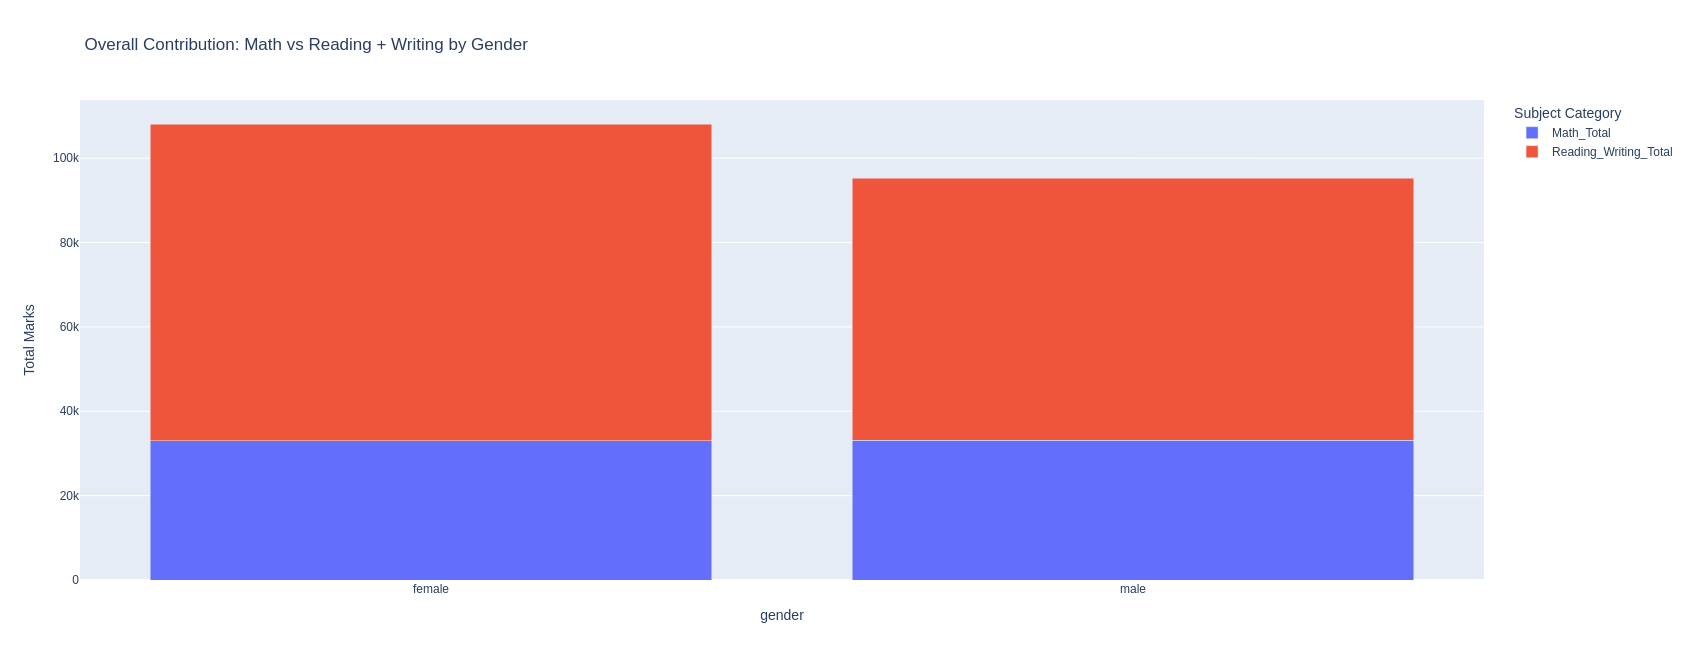

In [174]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [175]:
math_stats = data["math score"].describe()
math_stats


,math score
count,1000.00000
mean,66.08900
std,15.16308
min,0.00000
25%,57.00000
50%,66.00000
75%,77.00000
max,100.00000


In [176]:
fig = dt.histogram(
    data,
    x="math score",
    nbins=20,
    title="Distribution of Math Scores"
)
fig.show()

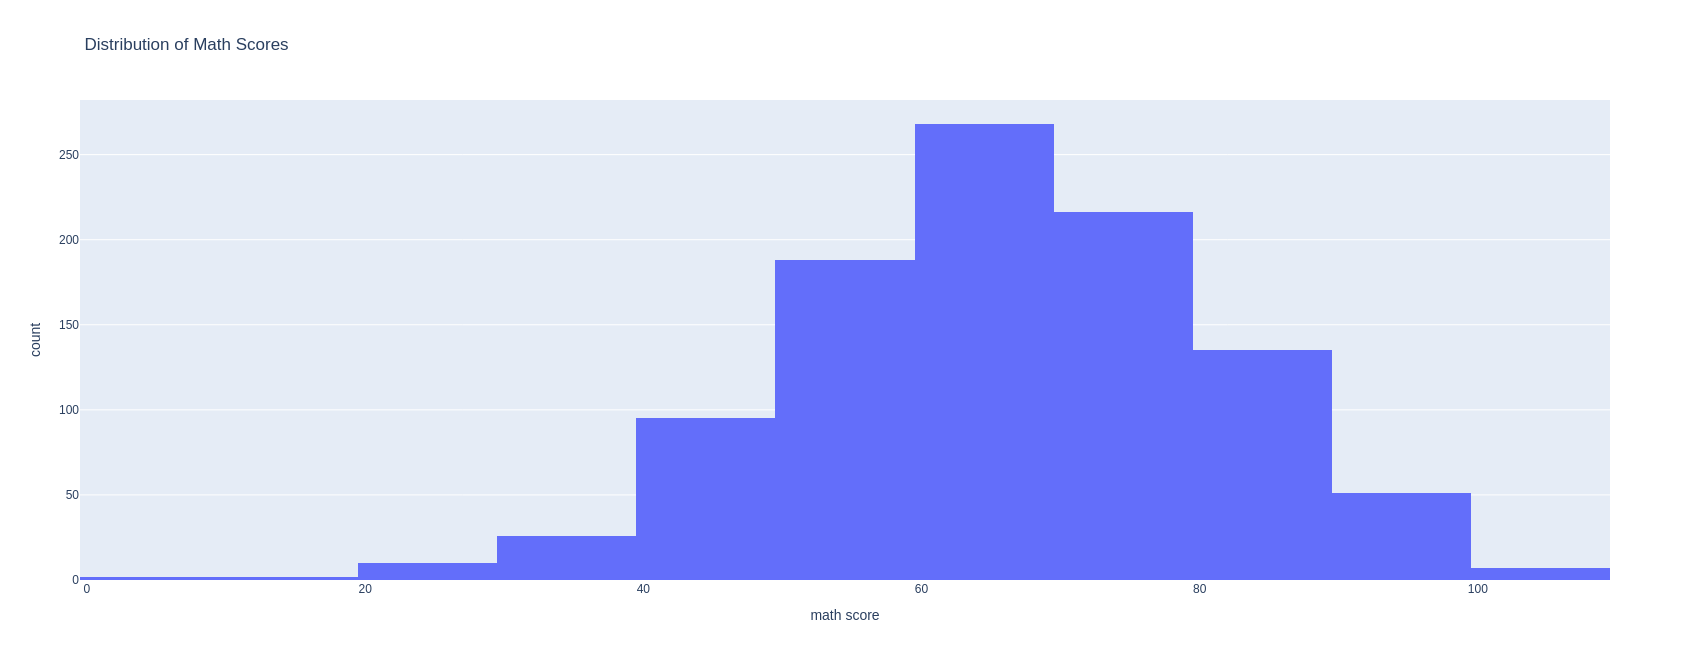

In [177]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [178]:
reading_stats = data["reading score"].describe()
reading_stats


,reading score
count,1000.000000
mean,69.169000
std,14.600192
min,17.000000
25%,59.000000
50%,70.000000
75%,79.000000
max,100.000000


In [179]:
fig = dt.histogram(
    data,
    x="reading score",
    nbins=20,
    title="Distribution of Reading Scores"
)
fig.show()

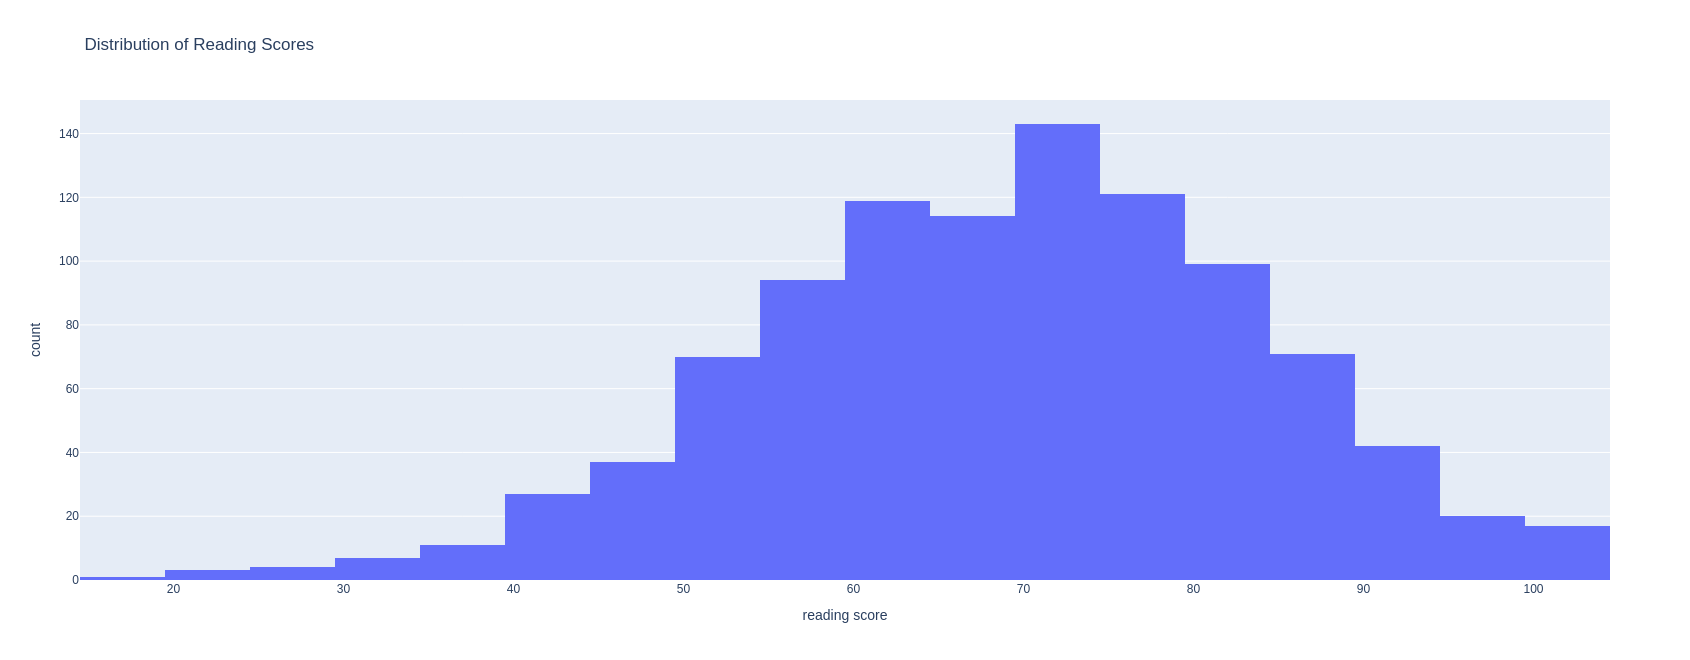

In [180]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [181]:
writing_stats = data["writing score"].describe()
writing_stats


,writing score
count,1000.000000
mean,68.054000
std,15.195657
min,10.000000
25%,57.750000
50%,69.000000
75%,79.000000
max,100.000000


In [182]:
fig = dt.histogram(
    data,
    x="writing score",
    nbins=20,
    title="Distribution of Writing Scores"
)
fig.show()

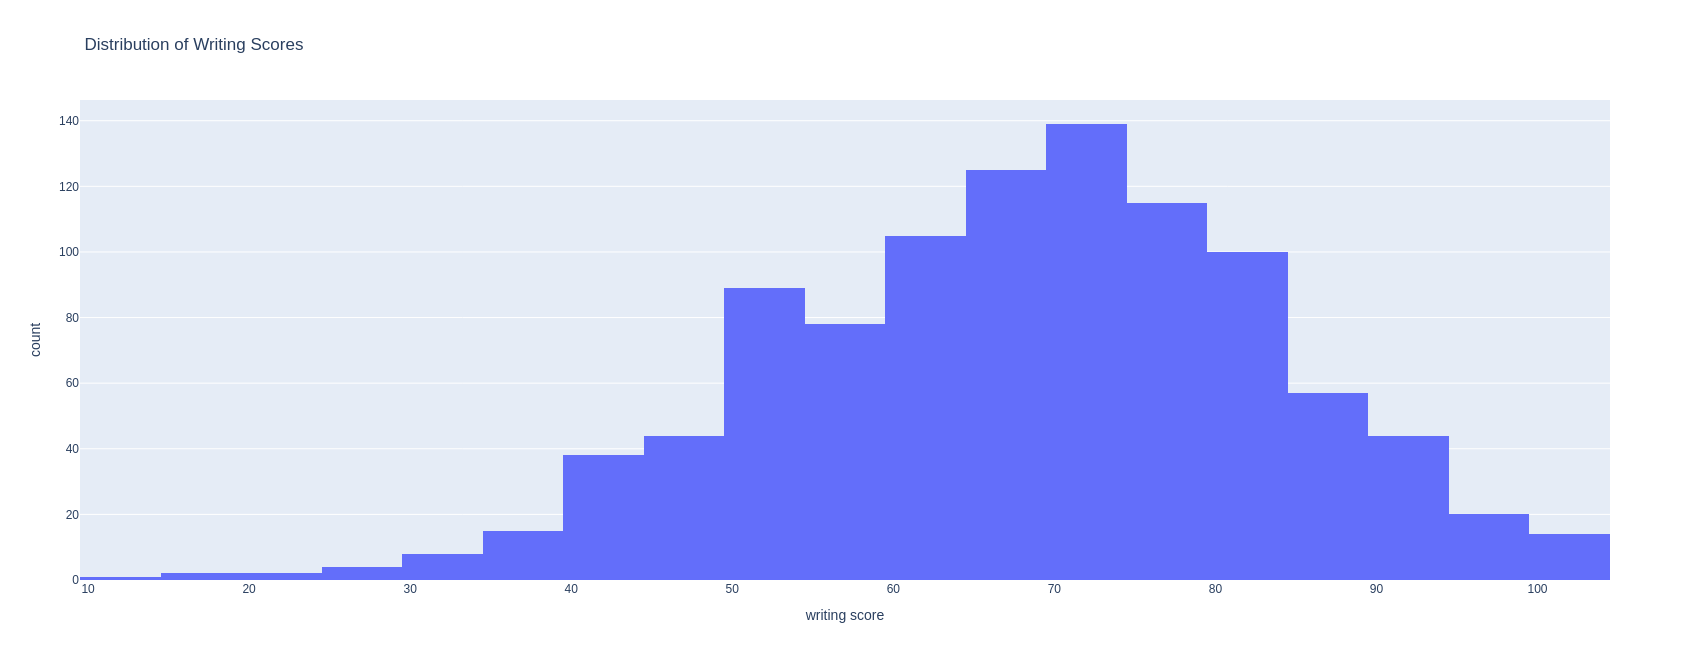

In [183]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [184]:
numerical_summary = data[["math score", "reading score", "writing score"]].describe()
numerical_summary


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [185]:
data["average_score"] = data[["math score", "reading score", "writing score"]].mean(axis=1)

fig = dt.histogram(
    data,
    x="average_score",
    nbins=20,
    title="Overall Student Performance Distribution"
)
fig.show()

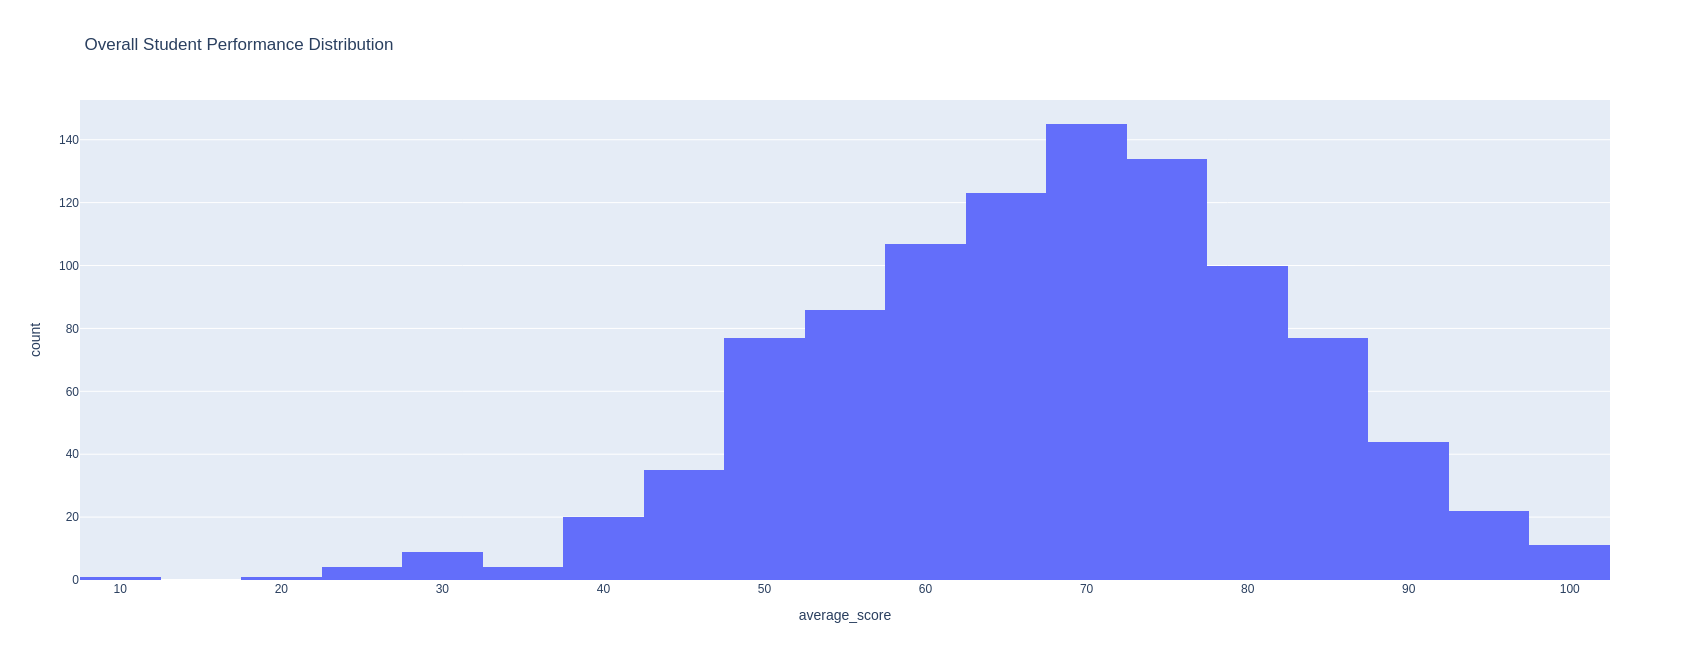

In [186]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [187]:

d1 = data.groupby('gender')['math score']


In [188]:
d1.sum()

,math score
gender,
female,32962
male,33127


In [189]:
d1.mean()

,math score
gender,
female,63.633205
male,68.728216


In [190]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=["Female", "Male"],
    y=d1.sum().values,
    name="Total Math Score"
))

fig.add_trace(go.Bar(
    x=["Female", "Male"],
    y=data.groupby("gender")["math score"].mean().values,
    name="Average Math Score"
))

fig.update_layout(
    title="Total vs Average Math Score by Gender",
    barmode="group",
    yaxis_title="Score",
    xaxis_title="Gender"
)

fig.show()


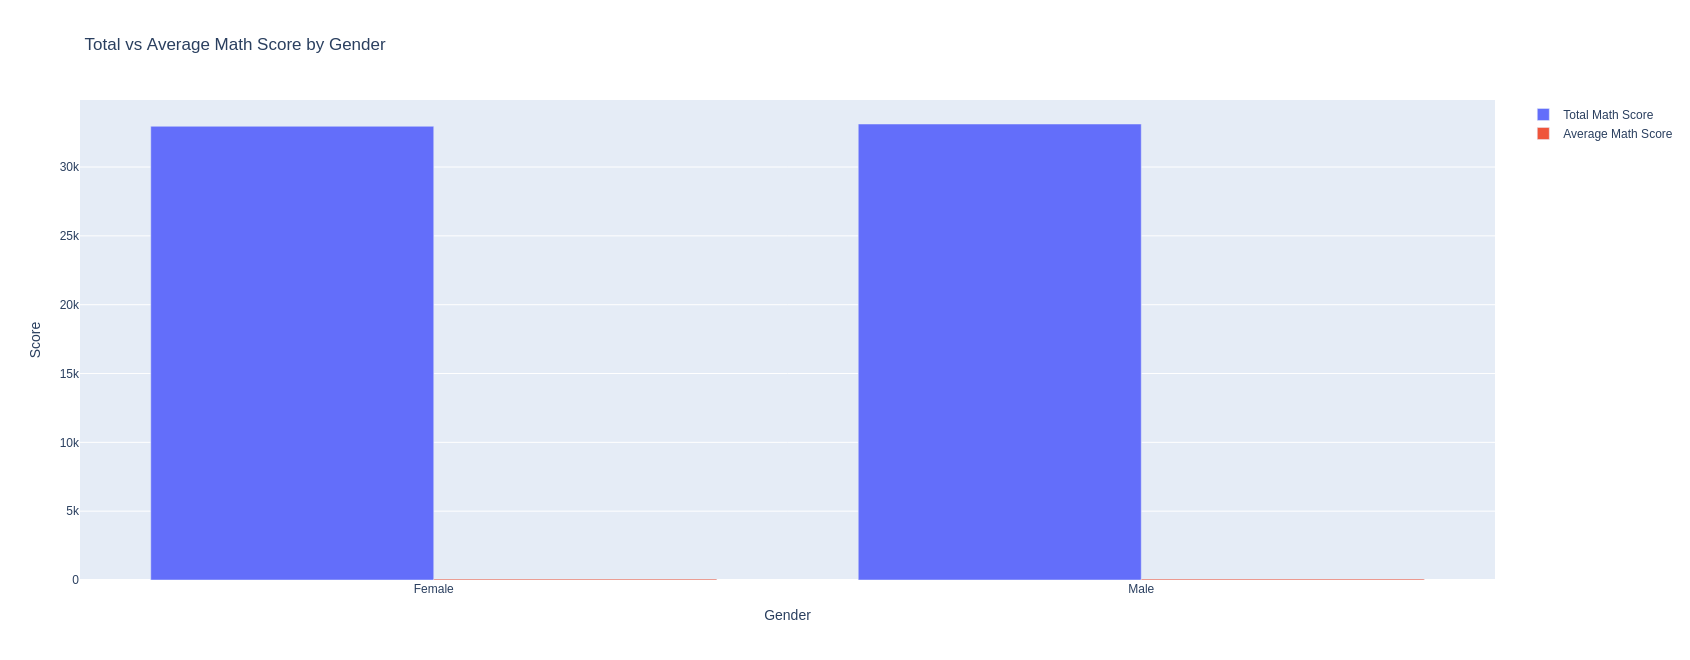

In [191]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [192]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=data["gender"],
        y=data["math score"],
        mode="markers",
        name="Math Score",
        marker=dict(opacity=0.6)
    )
)

fig.update_layout(
    title="Math Score Distribution by Gender",
    xaxis_title="Gender",
    yaxis_title="Math Score"
)

fig.show()


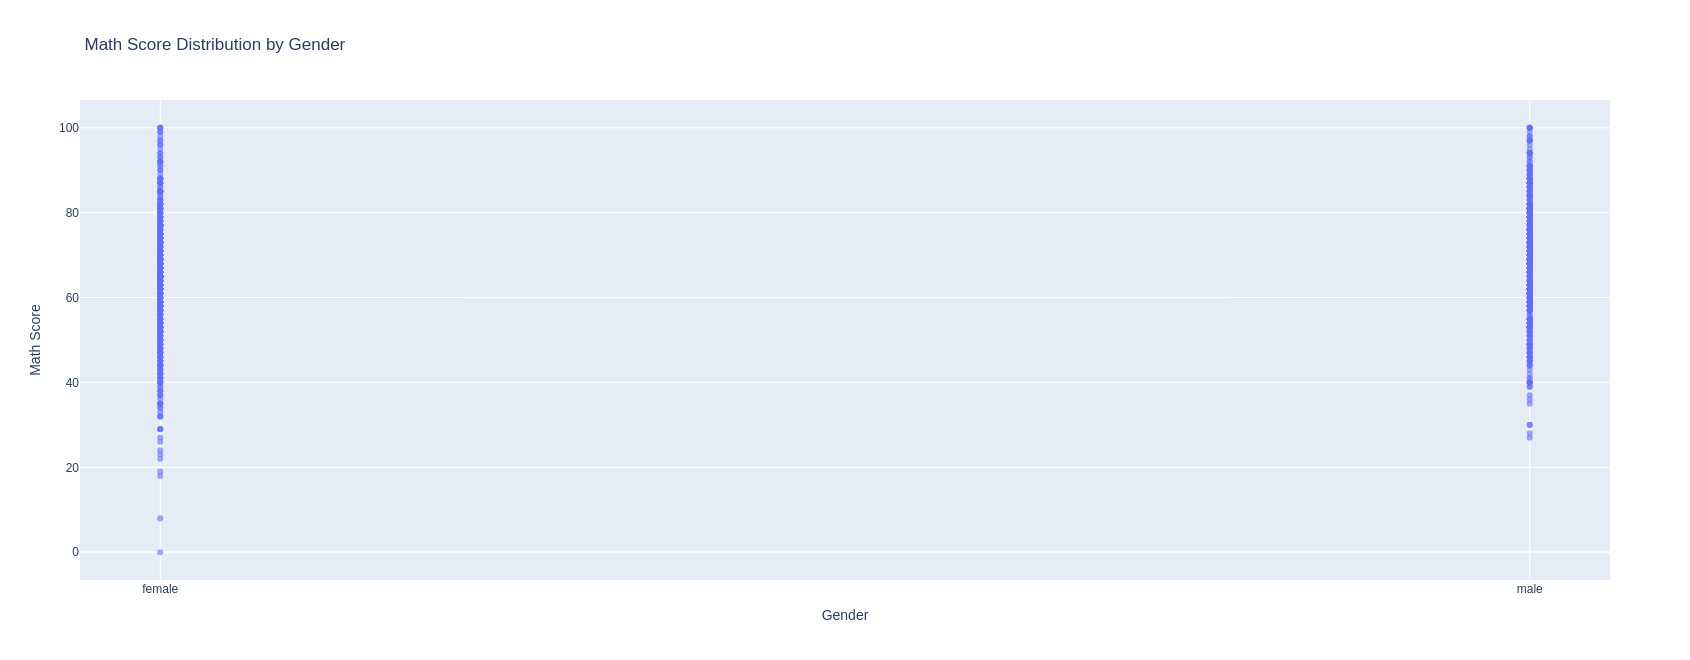

In [193]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [194]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'perfect_score', 'average_score',
       'struggling_subject'],
      dtype='object')

In [195]:
data.describe()

,math score,reading score,writing score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [196]:

d1 = data.groupby('gender')['reading score']

In [197]:
d1.sum()

,reading score
gender,
female,37611
male,31558


In [198]:
d1.mean()

,reading score
gender,
female,72.608108
male,65.473029


In [199]:
fig = go.Figure()


fig.add_trace(go.Bar(
    x=["Female", "Male"],
    y=data.groupby("gender")["reading score"].sum().values,
    name="Total Reading Score"
))


fig.add_trace(go.Bar(
    x=["Female", "Male"],
    y=data.groupby("gender")["reading score"].mean().values,
    name="Average Reading Score"
))

fig.update_layout(
    title="Total vs Average Reading Score by Gender",
    barmode="group",
    yaxis_title="Score",
    xaxis_title="Gender"
)

fig.show()


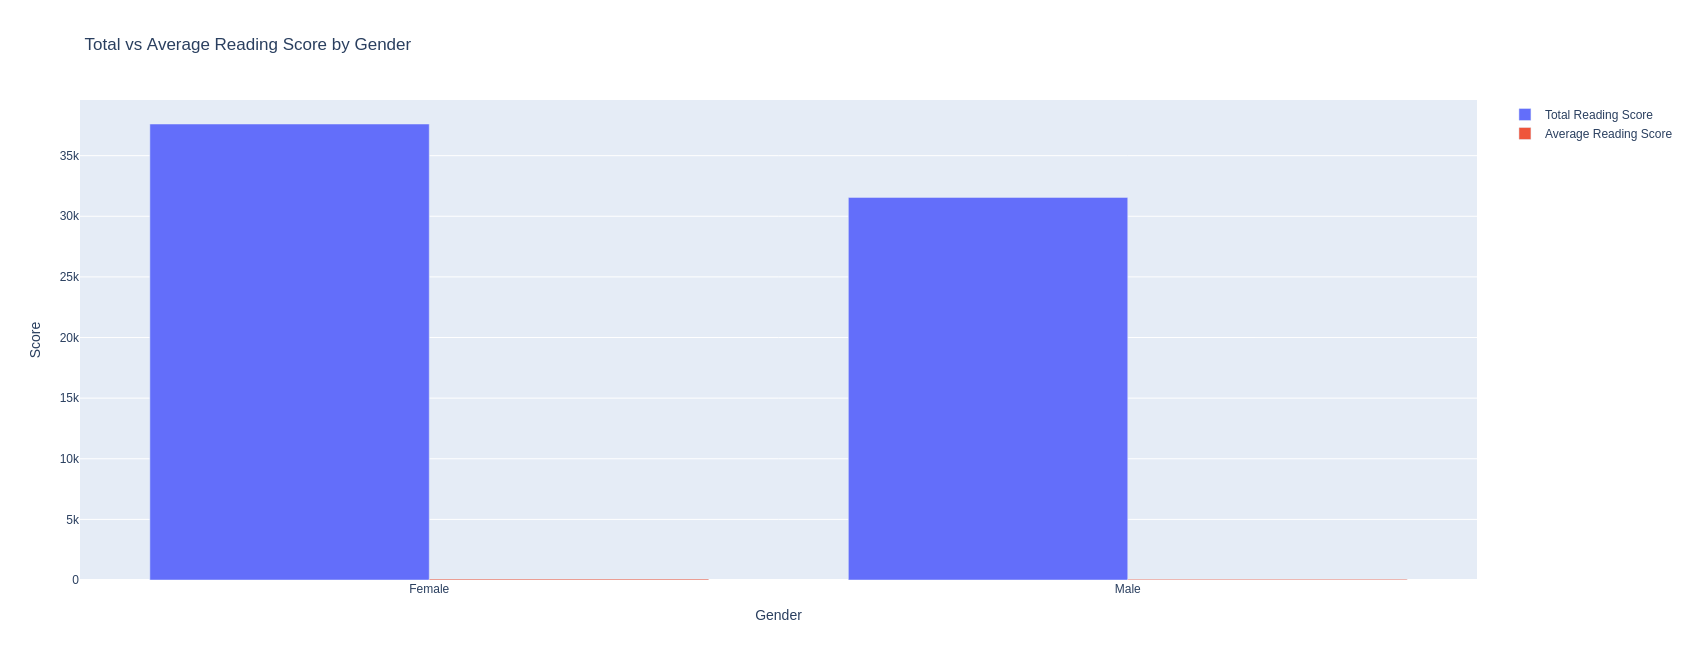

In [200]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [201]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=data["gender"],
        y=data["reading score"],
        mode="markers",
        name="Reading Score",
        marker=dict(opacity=0.6)
    )
)

fig.update_layout(
    title="Reading Score Distribution by Gender",
    xaxis_title="Gender",
    yaxis_title="Reading Score"
)

fig.show()


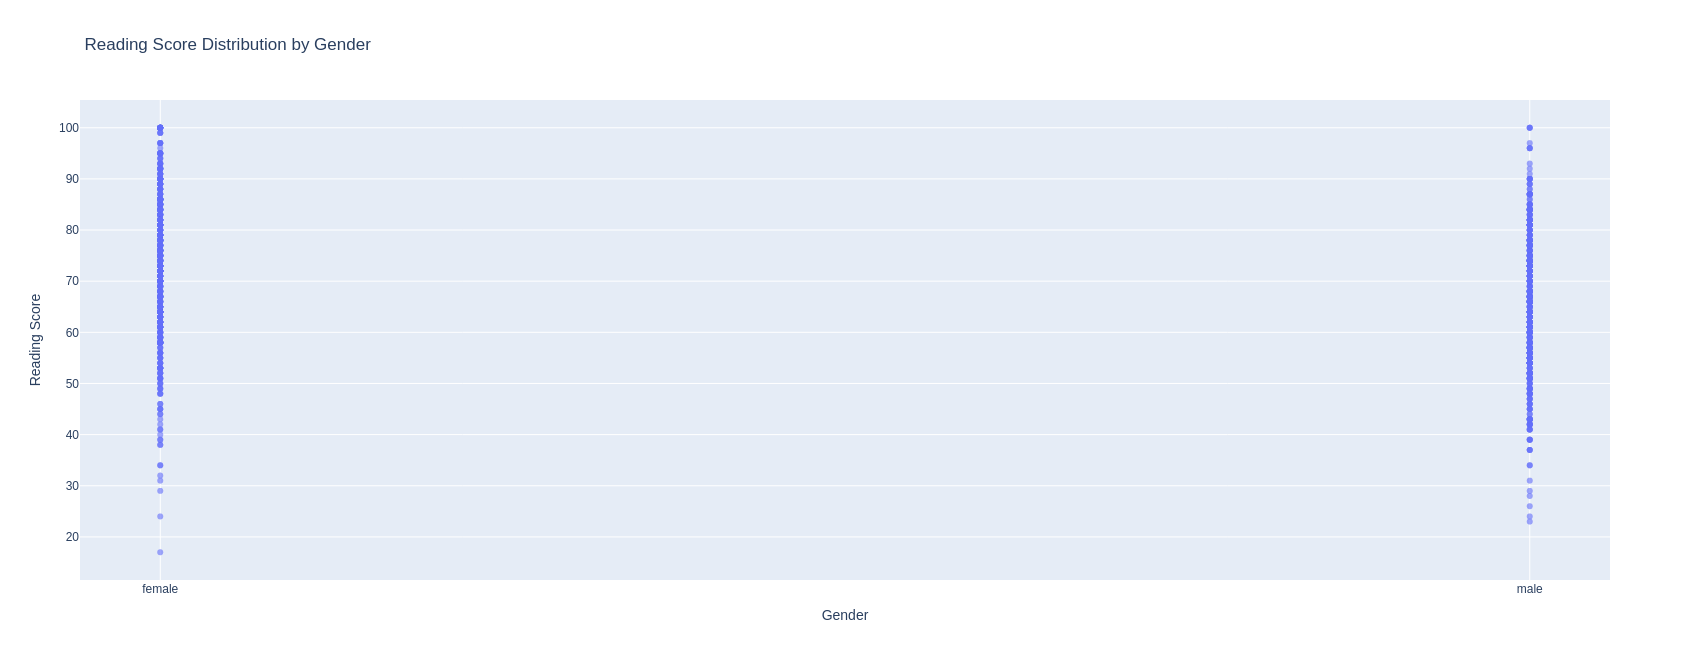

In [202]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [203]:

d1 = data.groupby('gender')['writing score']

In [204]:
d1.sum()

,writing score
gender,
female,37538
male,30516


In [205]:
d1.mean()

,writing score
gender,
female,72.467181
male,63.311203


In [206]:
fig = go.Figure()


fig.add_trace(go.Bar(
    x=["Female", "Male"],
    y=data.groupby("gender")["writing score"].sum().values,
    name="Total Writing Score"
))


fig.add_trace(go.Bar(
    x=["Female", "Male"],
    y=data.groupby("gender")["writing score"].mean().values,
    name="Average Writing Score"
))

fig.update_layout(
    title="Total vs Average Writing Score by Gender",
    barmode="group",
    yaxis_title="Score",
    xaxis_title="Gender"
)

fig.show()


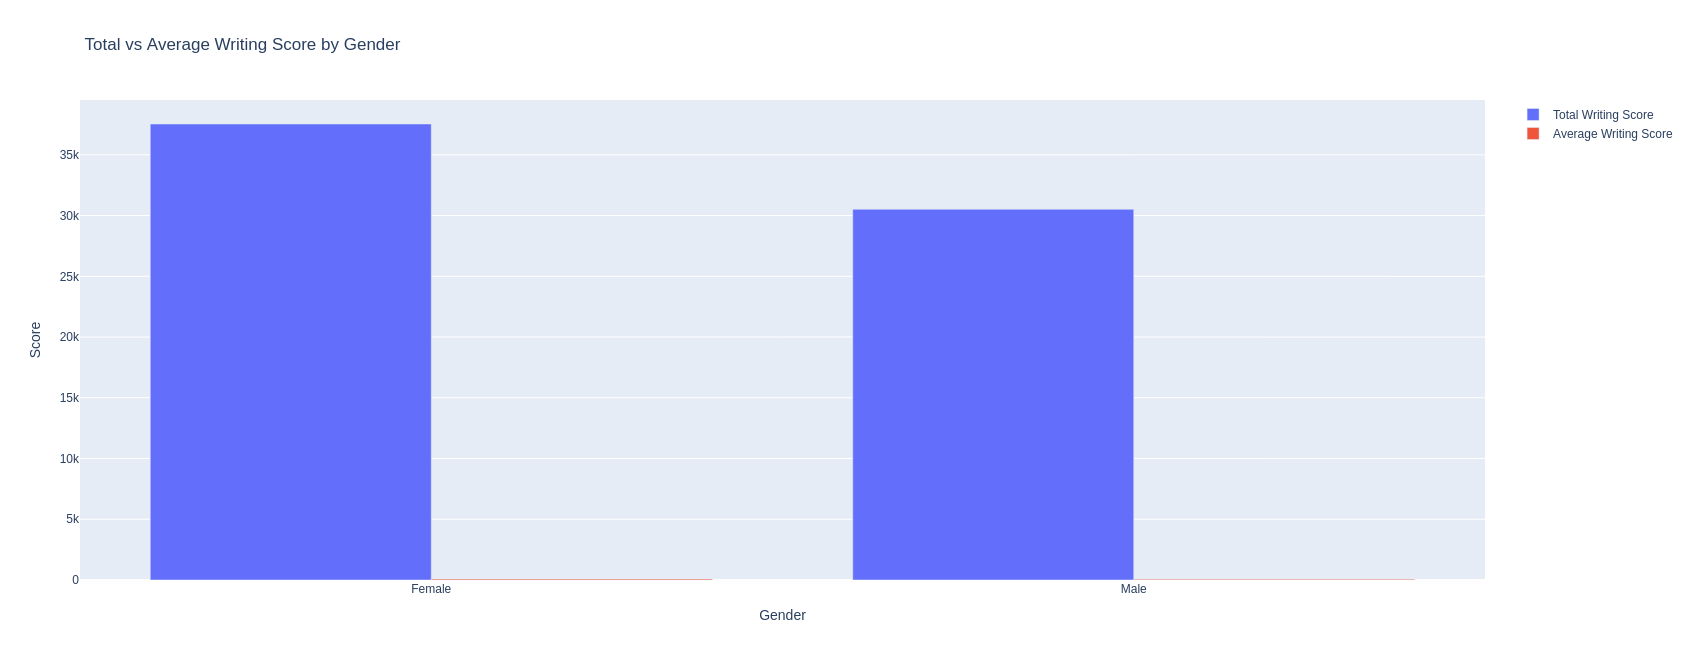

In [207]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [208]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=data["gender"],
        y=data["writing score"],
        mode="markers",
        name="writing score",
        marker=dict(opacity=0.6)
    )
)

fig.update_layout(
    title="Writing Score Distribution by Gender",
    xaxis_title="Gender",
    yaxis_title="writing score"
)

fig.show()


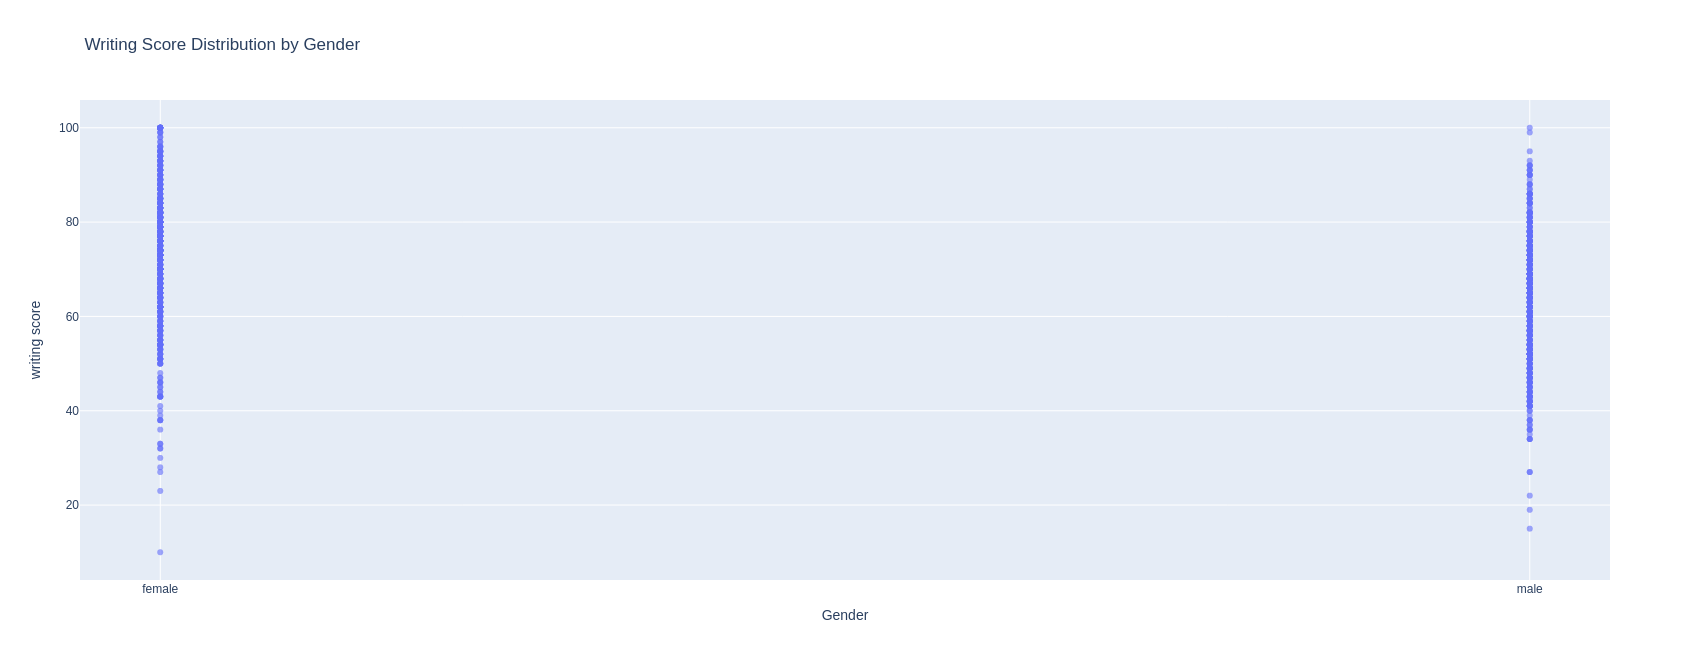

In [209]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [210]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data["gender"],
    y=data["reading score"],
    mode="markers",
    name="Reading Score",
    marker=dict(opacity=0.6)
))

fig.add_trace(go.Scatter(
    x=data["gender"],
    y=data["writing score"],
    mode="markers",
    name="Writing Score",
    marker=dict(opacity=0.6)
))

fig.update_layout(
    title="Reading and Writing Scores by Gender",
    xaxis_title="Gender",
    yaxis_title="Score"
)

fig.show()


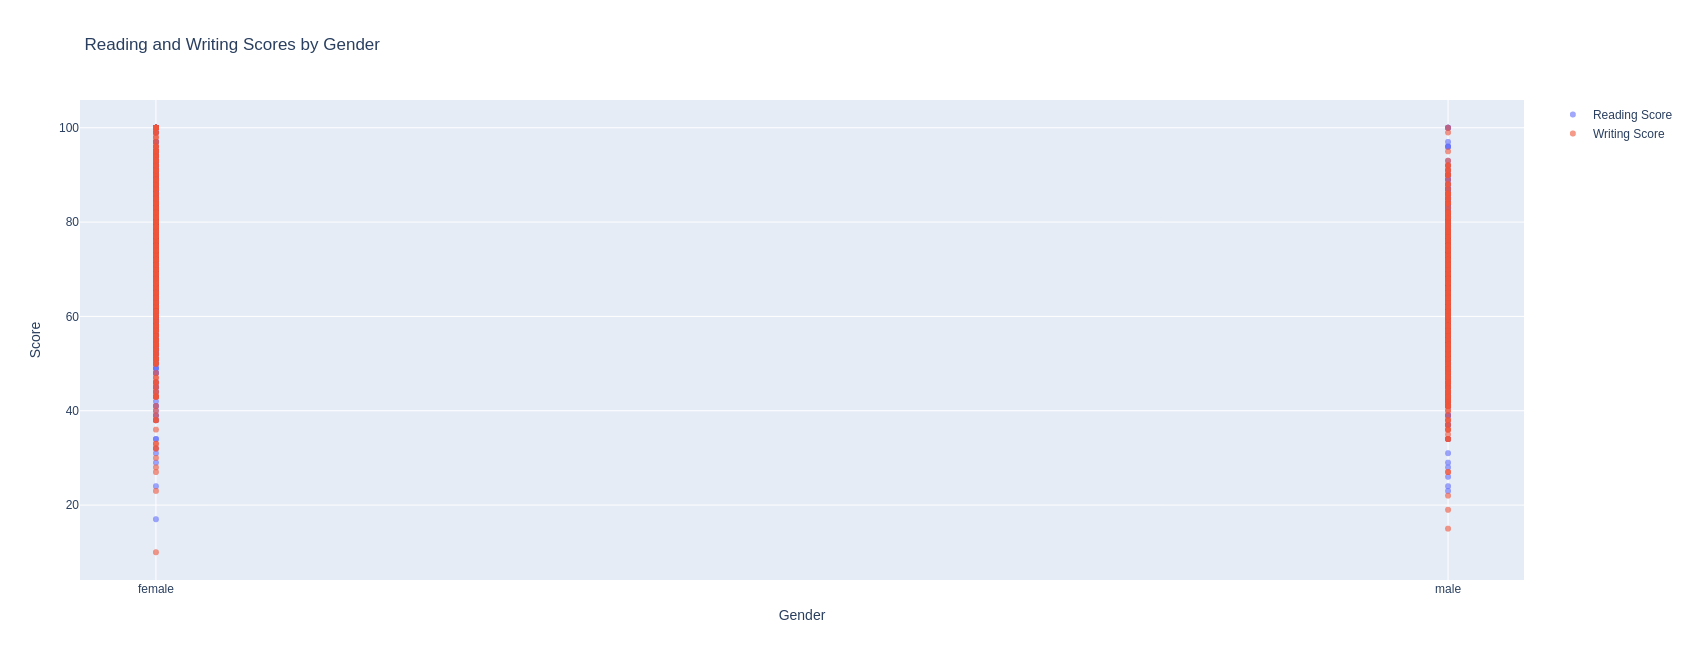

In [211]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [212]:
fig = go.Figure()

fig.add_trace(go.Box(
    x=data["gender"],
    y=data["math score"],
    name="Math Score"
))

fig.update_layout(
    title="Math Score Distribution by Gender",
    xaxis_title="Gender",
    yaxis_title="Math Score"
)

fig.show()


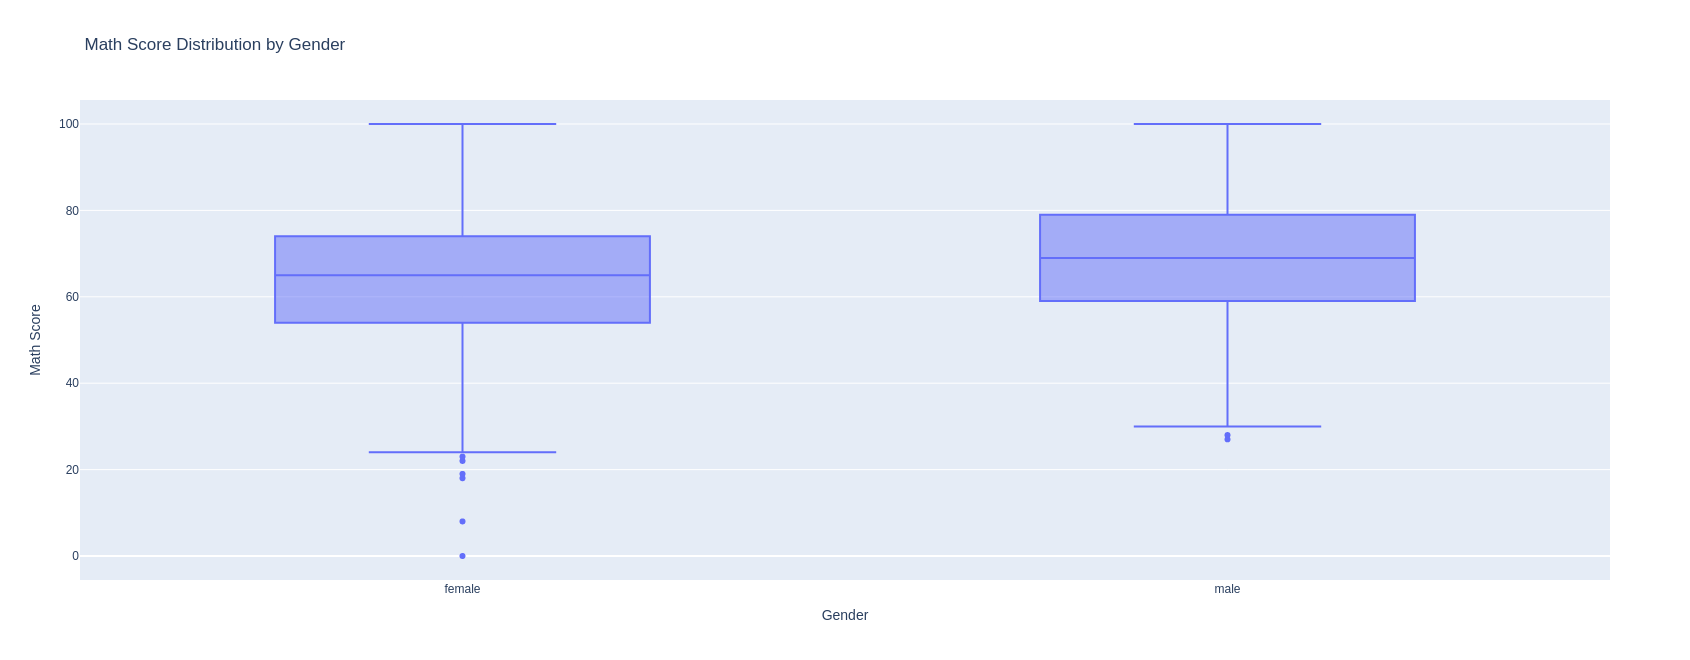

In [213]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [214]:
lunch_avg = data.groupby("lunch")[["math score","reading score","writing score"]].mean()

fig = go.Figure()

for subject in lunch_avg.columns:
    fig.add_trace(go.Bar(
        x=lunch_avg.index,
        y=lunch_avg[subject],
        name=subject
    ))

fig.update_layout(
    title="Average Subject Scores by Lunch Type",
    xaxis_title="Lunch Type",
    yaxis_title="Average Score",
    barmode="group"
)

fig.show()


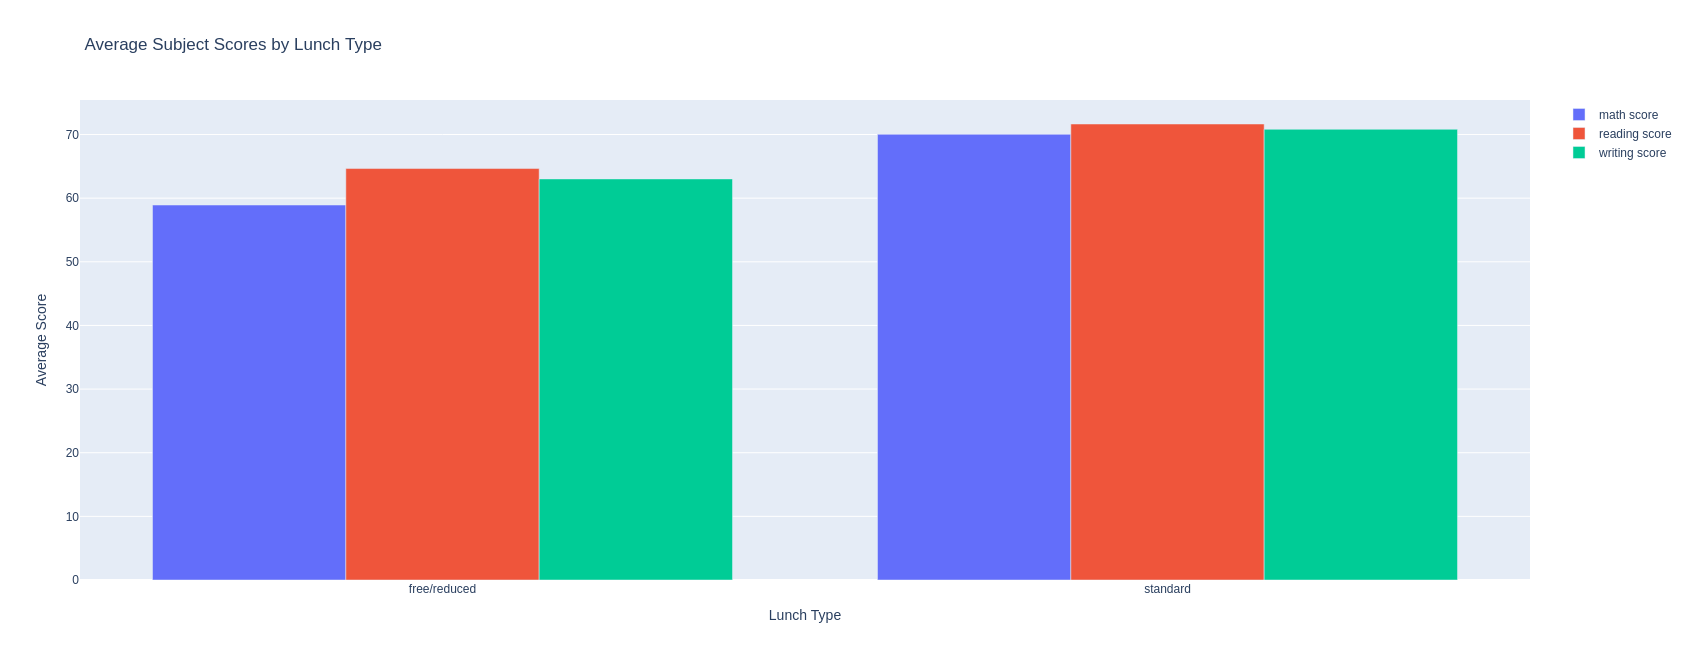

In [215]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [216]:
def struggle(row):
    scores = {
        "Math": row["math score"],
        "Reading": row["reading score"],
        "Writing": row["writing score"]
    }
    return min(scores, key=scores.get)

data["struggling_subject"] = data.apply(struggle, axis=1)

struggle_gender = (
    data.groupby(["gender", "struggling_subject"])
    .size()
    .unstack()
    .fillna(0)
)

fig = go.Figure()

for subject in struggle_gender.columns:
    fig.add_trace(go.Bar(
        x=struggle_gender.index,
        y=struggle_gender[subject],
        name=subject
    ))

fig.update_layout(
    title="Struggling Subjects by Gender",
    xaxis_title="Gender",
    yaxis_title="Number of Students",
    barmode="stack"
)

fig.show()


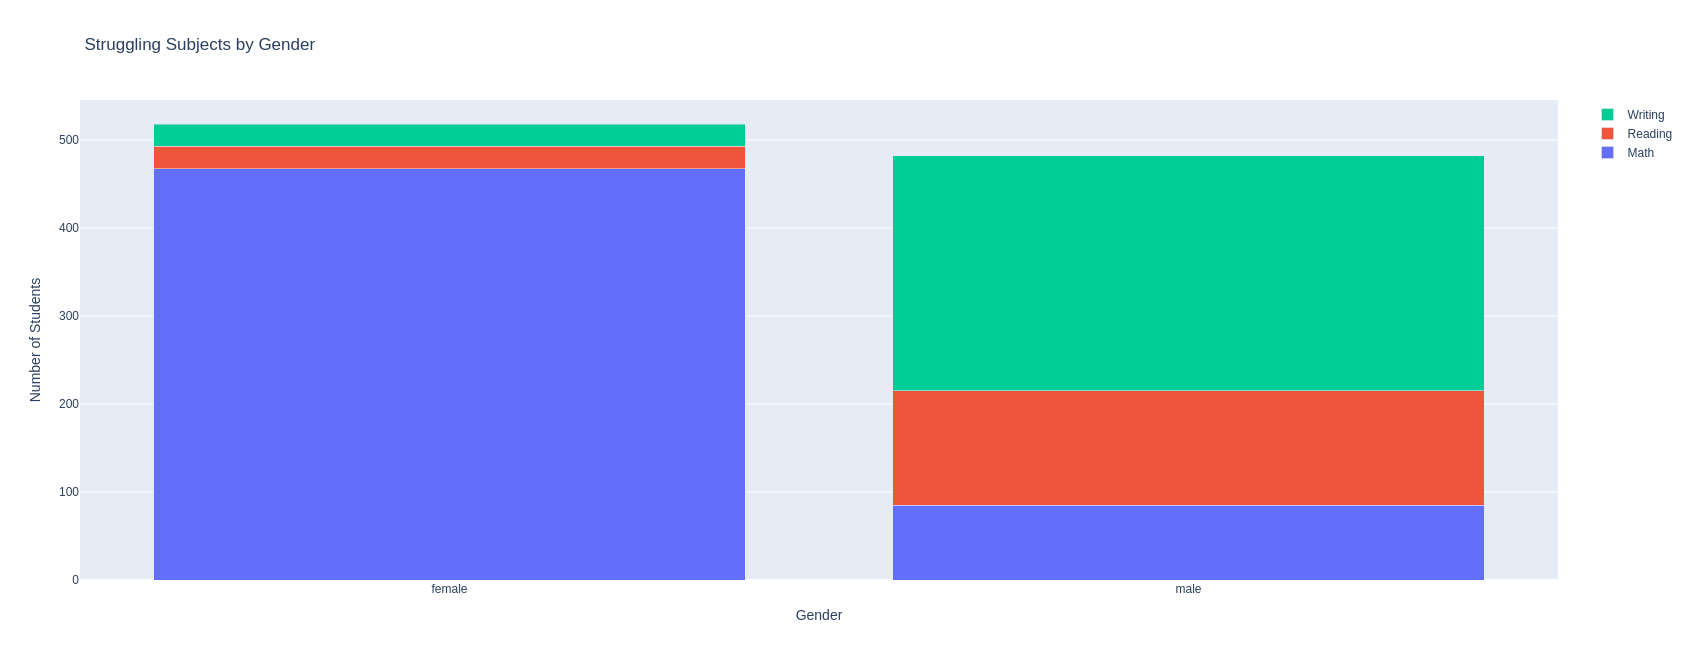

In [217]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [218]:
gender_avg = data.groupby("gender")[["math score", "reading score", "writing score"]].mean()
gender_avg

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [219]:
testprep_avg = data.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()
testprep_avg


,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [220]:
import plotly.express as dt

testprep_avg = data.groupby("test preparation course")[[
    "math score", "reading score", "writing score"
]].mean().reset_index()

dt.bar(
    testprep_avg,
    x="test preparation course",
    y=["math score", "reading score", "writing score"],
    barmode="group",
    title="Average Scores by Test Preparation Course",
    labels={"value": "Average Score", "test preparation course": "Test Preparation"}
)


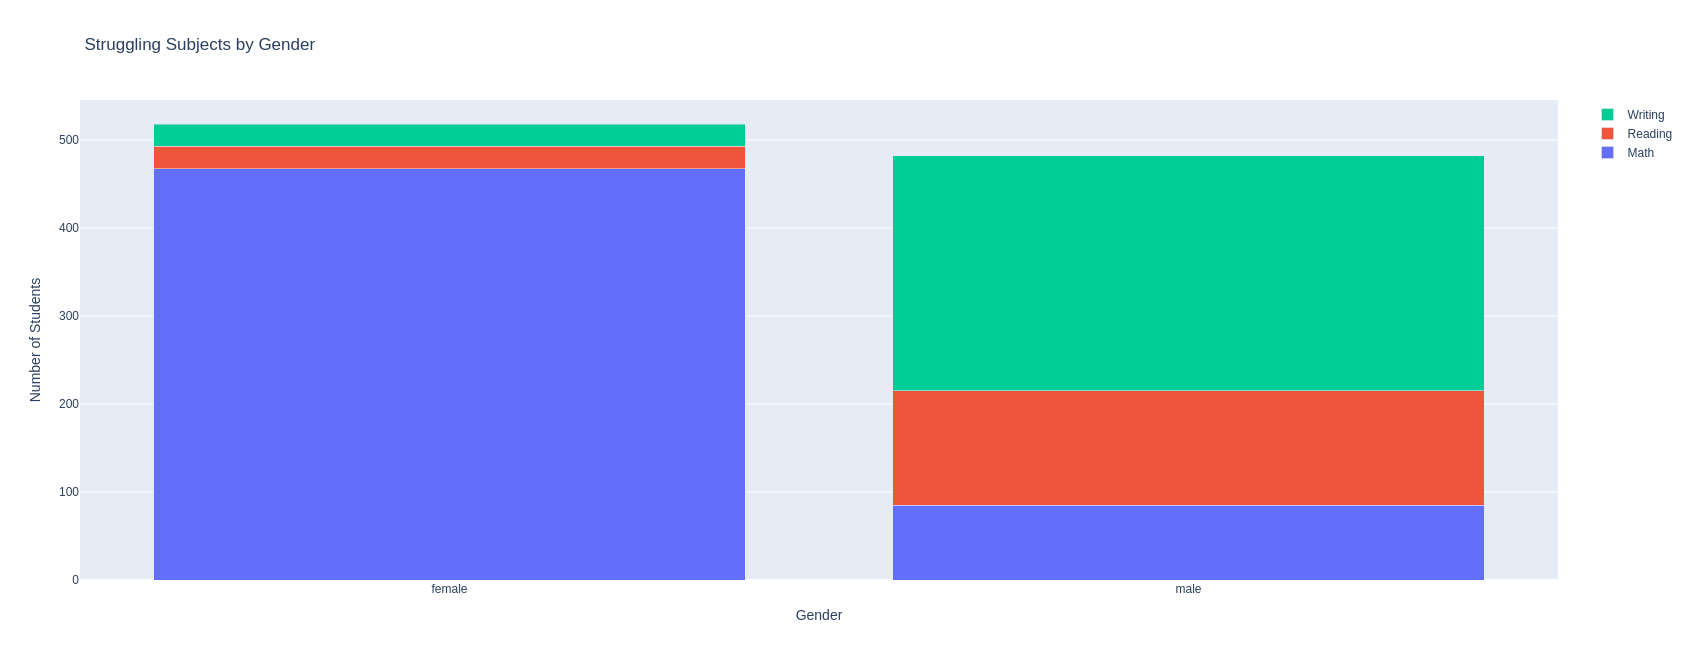

In [221]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)


In [222]:
fig = dt.box(
    data,
    x="test preparation course",
    y="math score",
    title="Math Score Spread by Test Preparation Course"
)
fig.show()

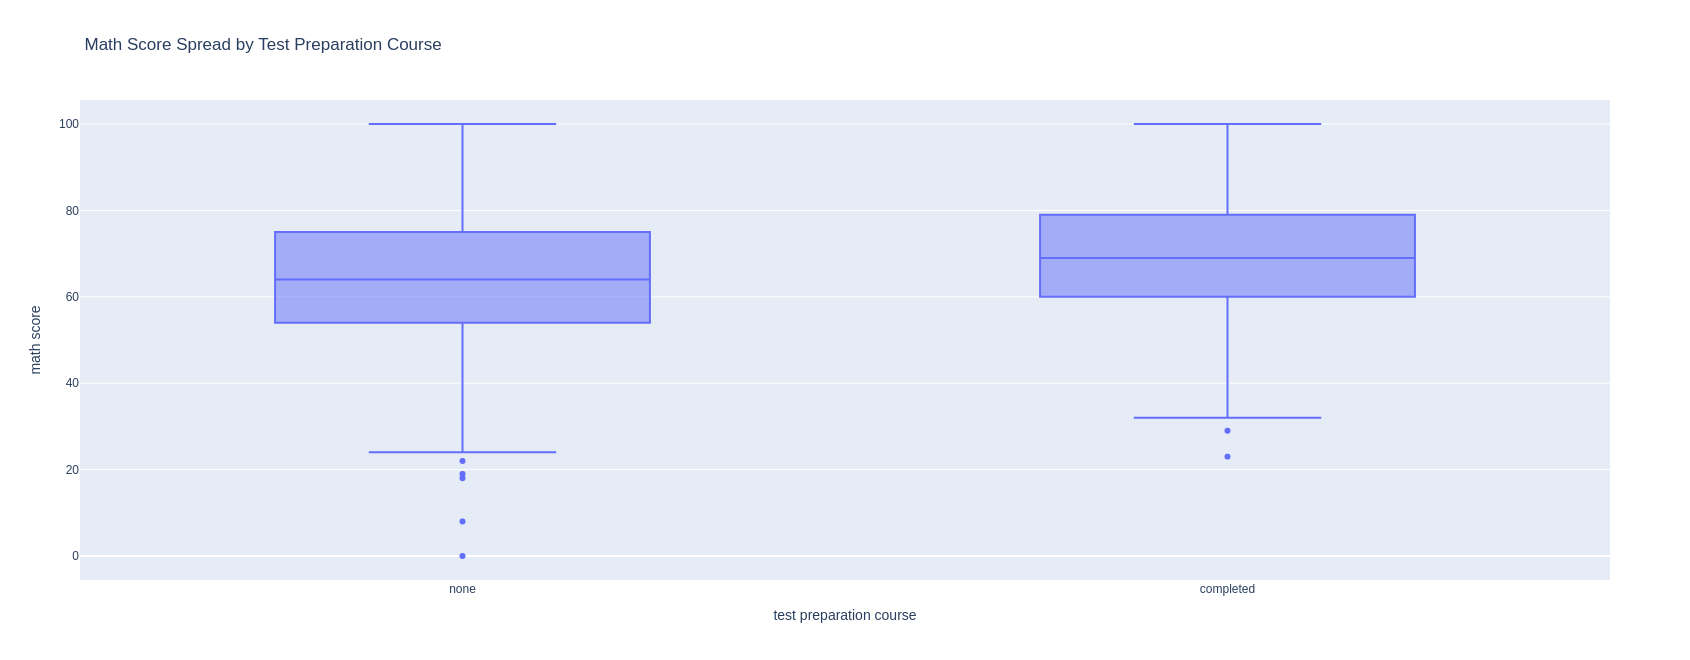

In [223]:
ot = fig.to_image(
    format="png",
    width=1690,
    height=660,
    scale=1
)

Image(ot)
